# **Universidad Nacional de Colombia, Sede Bogotá**
## **Minería de Datos**
### **Prof. Elizabeth León G.**
### **Tema**: Proyecto Final

# Presentado por: 
###                Juan Andrés Caballero Martínez
###                Katherin Quintero Parra

En un principio se carga el conjunto de datos y se consulta el número de registros y de atributos

In [5]:
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute
from random import randint, uniform,random

datos = pd.read_csv("./brain_stroke.csv")
print('Número de registros = %d' % (datos.shape[0]))
print('Número de atributos = %d' % (datos.shape[1]))
datos

Número de registros = 4981
Número de atributos = 11


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# 1.1) Rango de valores por atributo:

A continuación se calcula el rango de valores que pueden tomar cada uno de los atributos del conjunto de datos.

In [ ]:
def mayormenor(dato):
  datomenor = dato[0]
  datomayor = dato[0]
  tamano = dato.shape[0]

  for i in range(0,tamano):
    dato_actual = dato[i]
    if dato_actual > datomayor:
      datomayor = dato_actual
    if dato_actual < datomenor:
      datomenor = dato_actual
  return datomenor, datomayor

Rango de valores para el atributo: 'age'



In [ ]:
edad = datos['age']
edad_menor, edad_mayor = mayormenor(edad)
print("Edad menor: "+str(edad_menor))
print("Edad mayor: "+str(edad_mayor))

Edad menor: 0.08
Edad mayor: 108.0


Rango de valores para el atributo: 'hypertension':

Valores binarios, 0 o 1.

Rango de valores para el atributo: 'heart_disease':

Valores binarios, 0 o 1.

Rango de valores para el atributo: 'ever_married':

Valores binarios, 'Yes', 'NO'.

Rango de valores para el atributo: 'work_type':

Valores categóricos: 'Private', 'Self-employed', 'Govt job', 'Children'

Rango de valores para el atributo: 'Residence-type':

Valores binarios, 'Urban', 'Rural'.

Rango de valores para el atributo: 'avg_glucose_level':

In [ ]:
glucosa = datos['avg_glucose_level']
glucosa_menor,glucosa_mayor = mayormenor(glucosa)
print("Glucosa menor: "+str(glucosa_menor))
print("Glucosa mayor: "+str(glucosa_mayor))

Glucosa menor: 55.12
Glucosa mayor: 271.74


Rango de valores para el atributo: 'bmi':

In [ ]:
bmi = datos['bmi']
bmi_menor,bmi_mayor = mayormenor(bmi)
print("BMI menor: "+str(bmi_menor))
print("BMI mayor: "+str(bmi_mayor))

BMI menor: 14.0
BMI mayor: 48.9


Rango de valores para el atributo: 'smoking_status':

Valores categóricos: 'formerly smoked', 'never smoked', 'smokes', 'Unknown'

Rango de valores para el atributo: 'stroke':

Valores binarios, 0 o 1.

# 1.2) Identificación de valores perdidos
Se consulta el número de valores perdidos por cada atributo del conjunto:

In [6]:
print('Número de valores perdidos por cada atributo:')
for col in datos.columns:
    print('\t%s: %d' % (col,datos[col].isna().sum()))

Número de valores perdidos por cada atributo:
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	ever_married: 0
	work_type: 0
	Residence_type: 0
	avg_glucose_level: 0
	bmi: 0
	smoking_status: 0
	stroke: 0


Ya que no existen valores perdidos en el conjunto de datos, se colocarán de forma intencionada valores NA en las columnas de los registros. Los valores a eliminar fueron determinados de forma aleatoria previamente.

In [7]:
import math
aleatorio1 = [2, 80, 233, 392, 491, 577, 694, 729, 854, 908, 1010, 1132, 1293, 1365, 1499, 1591, 1643, 1721, 1835, 1908, 2050, 2184, 2251, 2301, 2498, 2516, 2681, 2755, 2800, 2931, 3015, 3167, 3201, 3352, 3477, 3510, 3618, 3700, 3845, 3913, 4001]
aleatorio2 = ['Residence_type', 'gender', 'hypertension', 'stroke', 'smoking_status', 'heart_disease', 'age', 'ever_married', 'bmi', 'avg_glucose_level', 'work_type']
for i in aleatorio1:
    j = i % 11
    res = aleatorio2[j]
    datos[res][i] = math.nan

datos

<ipython-input-7-014ec0700380>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[res][i] = math.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,NaN,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0.0,0.0,No,Private,Rural,70.15,29.8,formerly smoked,0.0
4977,Male,40.0,0.0,0.0,Yes,Private,Urban,191.15,31.1,smokes,0.0
4978,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0.0
4979,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,30.0,smokes,0.0


Ahora se consulta el nuevo reporte de valores perdidos en el conjunto de datos. 

In [8]:
print('Número de valores perdidos por cada atributo:')
for col in datos.columns:
    print('\t%s: %d' % (col,datos[col].isna().sum()))

Número de valores perdidos por cada atributo:
	gender: 6
	age: 5
	hypertension: 3
	heart_disease: 5
	ever_married: 5
	work_type: 3
	Residence_type: 1
	avg_glucose_level: 2
	bmi: 5
	smoking_status: 3
	stroke: 3


Se puede apreciar que, para los distintos atributos que conforman el conjunto de datos, se reportan valores perdidos en la totalidad de dimensiones.

# 1.3) Tratamiento de valores perdidos

A continuación, se hará un reemplazo de los valores perdidos. Para ello, se calculará la moda para cada una de las dimensiones del conjunto de datos y se utilizará dicho valor como un representante de la dimensión; así, los valores perdidos serán reemplazados por el valor de la moda acorde a su dimensión.

In [9]:
import statistics as stat
#cálculo de moda para cada una de las dimensiones
#calculo para genero
gender = datos['gender']
gender_moda = stat.mode(gender)
#calculo para edad
age = datos['age']
age_moda = stat.mode(age)
#calculo para hipertension
hypertension = datos['hypertension']
hypertension_moda = stat.mode(hypertension)
#calculo para enfermedad del corazon
heart_disease = datos['heart_disease']
heart_disease_moda = stat.mode(heart_disease)
#calculo para estado civil
ever_married = datos['ever_married']
ever_married_moda = stat.mode(ever_married)
#calculo para tipo de trabajo
work_type = datos['work_type']
work_type_moda = stat.mode(work_type)
#calculo para tipo de residencia
Residence_type = datos['Residence_type']
Residence_type_moda = stat.mode(Residence_type)
#calculo para promedio de glucosa
avg_glucose_level = datos['avg_glucose_level']
avg_glucose_level_moda = stat.mode(avg_glucose_level)
#calculo de BMI
bmi = datos['bmi']
bmi_moda = stat.mode(bmi)
#calculo para estado de fumador
smoking_status = datos['smoking_status']
smoking_status_moda = stat.mode(smoking_status)
#calculo para estado de accidente cerebro-vascular
stroke = datos['stroke']
stroke_moda = stat.mode(stroke)

Ahora, se reemplazará cada valor NA con su correspondiente valor de moda

In [10]:
total = datos.shape[0]
dimensiones = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']
for i in range(0,total):
    #print("hola")
    for j in dimensiones:
        #print(j)
        if pd.isna(datos[j][i]):
            if j == 'gender':
                datos[j][i] = gender_moda
            elif j == 'hypertension':
                datos[j][i] = hypertension_moda
            elif j == 'heart_disease':
                datos[j][i] = heart_disease_moda
            elif j == 'ever_married':
                datos[j][i] = ever_married_moda
            elif j == 'work_type':
                datos[j][i] = work_type_moda
            elif j == 'age':
                datos[j][i] = age_moda
            elif j == 'Residence_type':
                datos[j][i] = Residence_type_moda
            elif j == 'avg_glucose_level':
                datos[j][i] = avg_glucose_level_moda
            elif j == 'bmi':
                datos[j][i] = bmi_moda
            elif j == 'smoking_status':
                datos[j][i] = smoking_status_moda
            elif j == 'stroke':
                datos[j][i] = stroke_moda
datos

<ipython-input-10-ac196eb155bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[j][i] = hypertension_moda
<ipython-input-10-ac196eb155bf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[j][i] = stroke_moda
<ipython-input-10-ac196eb155bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[j][i] = ever_married_moda
<ipython-input-10-ac196eb155bf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0.0,0.0,No,Private,Rural,70.15,29.8,formerly smoked,0.0
4977,Male,40.0,0.0,0.0,Yes,Private,Urban,191.15,31.1,smokes,0.0
4978,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0.0
4979,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,30.0,smokes,0.0


y ahora, se reporta el número de datos perdidos luego del tratamiento de la información. Es de esperarse que el número de valores perdidos sea cero ya que a cada uno de ellos se le asignó un valor representante acorde a la dimensión.

In [11]:
print('Número de valores perdidos por cada atributo:')
for col in datos.columns:
    print('\t%s: %d' % (col,datos[col].isna().sum()))

Número de valores perdidos por cada atributo:
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	ever_married: 0
	work_type: 0
	Residence_type: 0
	avg_glucose_level: 0
	bmi: 0
	smoking_status: 0
	stroke: 0


# 2) Detección de outliers

Dado que la mayoría de los atributos del conjunto de datos son de tipo binario y categóricos, en ellos no sea realiza el proceso de detección de outliers.

Debido a que el atributo de nivel de glucosa contiene información relevante incluso para valores que están 3 desviaciones estándar por encima de la media en pacientes que sufren de diabetes, se decide no hacer filtrado por outliers.

De igual forma, para el atributo del índice de masa corporal BMI se decide  no hacer filtrado por outliers.


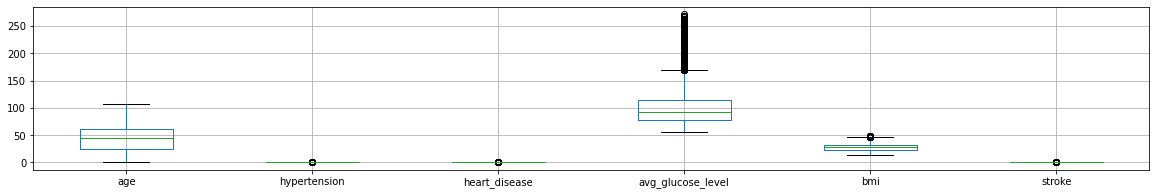

In [12]:
%matplotlib inline

datos.boxplot(figsize=(20,3))

En cambio, el atributo edad contiene datos inconsistentes como lo son edades dadas en valores decimales, menores a 1 y edades muy grandes superiores a los 100 años. Así que se realiza un filtrado de dichos valores inconsistentes.

In [13]:
datos = datos.drop(datos[datos['age'] > 100].index)
datos = datos.drop(datos[datos['age'] < 1].index)
datos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0.0,0.0,No,Private,Rural,70.15,29.8,formerly smoked,0.0
4977,Male,40.0,0.0,0.0,Yes,Private,Urban,191.15,31.1,smokes,0.0
4978,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0.0
4979,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,30.0,smokes,0.0


Se eliminaron los registros con edades menores a 1 años y mayores a 88 años, resultando ahora 4939 registros.

# 3) Eliminación de datos duplicados:

A continuación se detectan los valores duplicados del conjunto de datos

In [14]:
dups = datos.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


El conjunto de datos no cuenta con valores duplicados, así que de forma intencionada se agregarán filas que contienen valores duplicados, para posteriormente realizar un tratamiento y eliminar aquellas filas redundantes.

In [15]:
total = datos.shape[0]
aleatorio1 = [9, 80, 233, 392, 491, 577, 694, 729, 854, 908, 1010, 1132, 1293, 1365, 1499, 1591, 1643, 1721, 1835, 1908, 2050, 2184, 2251, 2301, 2498, 2516, 2681, 2755, 2800, 2931, 3015, 3167, 3201, 3352, 3477, 3510, 3618, 3700, 3845, 3913, 4001]
for i in aleatorio1:
    fila = datos.loc[i-1]
    datos.loc[i+1]= fila
datos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4977,Male,40.0,0.0,0.0,Yes,Private,Urban,191.15,31.1,smokes,0.0
4978,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0.0
4979,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,30.0,smokes,0.0
4980,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,29.1,never smoked,0.0


In [16]:
dups = datos.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 41


Se agregaron filas duplicadas en el conjunto de datos, obteniendo en total 41 registros duplicados. Ahora se procederá a hacer un tratamiento de valores duplicados en el conjunto de datos.

In [17]:
datos.drop_duplicates(inplace = True)
datos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0.0,0.0,No,Private,Rural,70.15,29.8,formerly smoked,0.0
4977,Male,40.0,0.0,0.0,Yes,Private,Urban,191.15,31.1,smokes,0.0
4978,Female,45.0,1.0,0.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0.0
4979,Male,40.0,0.0,0.0,Yes,Private,Rural,83.94,30.0,smokes,0.0


Se eliminan las filas duplicadas del dataframe, resultando ahora en 4899 registros.

In [18]:
dups = datos.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Finalmente se verifica que el conjunto de datos tenga 0 valores duplicados.

# 4) Agregación

Para el presente conjunto de datos no es necesario hacer agregación de dimensiones, ya que se decidió que las 11 dimensiones con las que cuenta el conjunto son suficientes para la tarea de clasificación.


# 5) Muestreo

A continuación se realiza un muestreo sin reemplazamiento del 1% del conjunto de datos.

In [ ]:
datos_muestra = datos.sample(frac=0.01, replace=False, random_state=1)
datos_muestra

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
847,Male,80.00,0.0,0.0,Yes,Self-employed,Rural,236.84,26.8,never smoked,0.0
4615,Male,24.00,0.0,0.0,No,Private,Rural,91.21,28.1,formerly smoked,0.0
2630,Male,32.00,0.0,0.0,Yes,Private,Urban,78.30,31.0,Unknown,0.0
2134,Female,8.00,0.0,0.0,No,children,Urban,80.47,20.6,Unknown,0.0
3177,Female,51.00,0.0,0.0,Yes,Govt_job,Rural,85.59,30.5,never smoked,0.0
3845,Female,78.00,0.0,0.0,Yes,Private,Urban,99.72,22.3,smokes,0.0
782,Male,2.00,0.0,0.0,No,children,Rural,56.77,20.9,Unknown,0.0
3495,Female,62.00,0.0,0.0,Yes,Private,Urban,101.19,23.4,never smoked,0.0
4863,Male,76.00,0.0,1.0,Yes,Private,Urban,79.05,28.3,Unknown,0.0
4375,Female,68.00,0.0,0.0,Yes,Self-employed,Rural,80.63,20.2,never smoked,0.0


# 6) Discretización

### 6.1) Discretización de las edades.

67.00    47
80.00    70
49.00    76
79.00    84
81.00    60
         ..
1.88      7
1.24      6
1.48      6
1.32      8
1.64      7
Name: age, Length: 93, dtype: int64

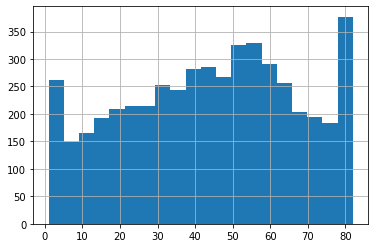

In [ ]:
datos['age'].hist(bins=20)
datos['age'].value_counts(sort=False)

### 6.2) Histograma de género

Male      2028
Female    2871
Name: gender, dtype: int64

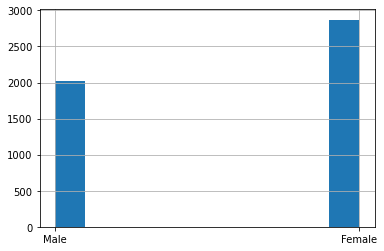

In [ ]:
datos['gender'].hist(bins=10)
datos['gender'].value_counts(sort=False)

Se puede apreciar que los datos contienen más personas de género femenino que del masculino.

### 6.3) Histograma de hipertensión

0.0    4423
1.0     476
Name: hypertension, dtype: int64

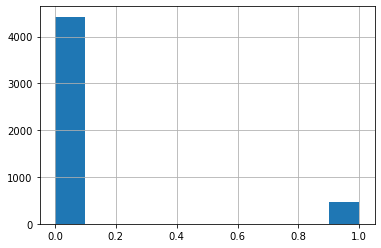

In [ ]:
datos['hypertension'].hist(bins=10)
datos['hypertension'].value_counts(sort=False)

Se puede apreciar que existen muchas más personas que no sufren de hipertensión comparada con aquella que sí padece dicha enfermedad.

### 6.4) Histograma de enfermedad del corazón

1.0     274
0.0    4625
Name: heart_disease, dtype: int64

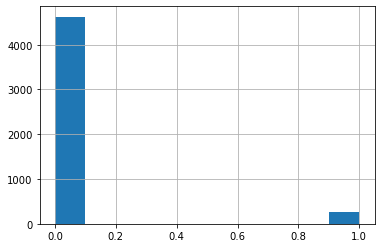

In [ ]:
datos['heart_disease'].hist(bins=10)
datos['heart_disease'].value_counts(sort=False)

Se aprecia que existe mucho más gente que no sufre de enfermedad del corazón que aquellos que sí la padecen.

### 6.5) Histograma de estado civil

Yes    3257
No     1642
Name: ever_married, dtype: int64

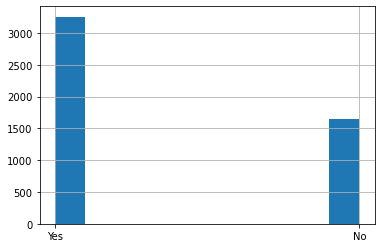

In [ ]:
datos['ever_married'].hist(bins=10)
datos['ever_married'].value_counts(sort=False)

### 6.6) Histograma de tipo de trabajo

Private          2840
Self-employed     801
Govt_job          635
children          623
Name: work_type, dtype: int64

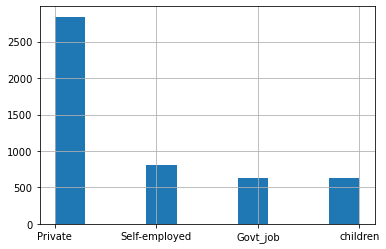

In [ ]:
datos['work_type'].hist(bins=10)
datos['work_type'].value_counts(sort=False)

Se observa que el tipo de trabajo mayoritario es de tipo privado.

### 6.7) Histograma de tipo de residencia:

Urban    2491
Rural    2408
Name: Residence_type, dtype: int64

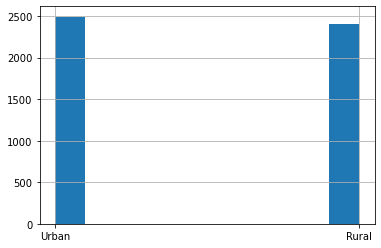

In [ ]:
datos['Residence_type'].hist(bins=10)
datos['Residence_type'].value_counts(sort=False)

Los tipos de residencia tanto urbanos como rurales son muy similares.

### 6.8) Histograma de nivel de glucosa promedio:


228.69    1
105.92    1
171.23    1
174.12    1
186.21    1
         ..
84.94     1
215.07    1
191.15    1
95.02     1
83.94     1
Name: avg_glucose_level, Length: 3844, dtype: int64

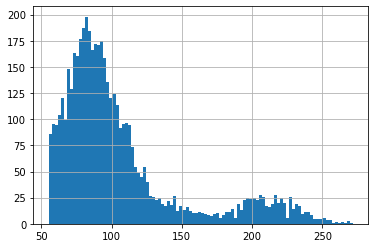

In [ ]:
datos['avg_glucose_level'].hist(bins=100)
datos['avg_glucose_level'].value_counts(sort=False)

La distribución del nivel de glucosa es muy similar a una Chi-cuadrado con los siguientes parámetros:

In [ ]:
media_glucosa = datos['avg_glucose_level'].mean()
print("Valor de media:  ")
print(media_glucosa)
desviacion_glucosa = datos['avg_glucose_level'].std()
print("Valor de desviación estándar:  ")
print(desviacion_glucosa)

Valor de media:  
106.07824249846873
Valor de desviación estándar:  
45.195549816177554


Se aprecia que la mayoría de datos se encuentra entre el rango 70-120, el cual es el límite normal de glucosa para una persona sana.

### 6.9) Histograma de índice de masa corporal IMC

36.6    14
32.5    22
34.4    18
24.0    28
29.0    29
        ..
46.9     2
47.1     1
48.1     1
46.3     1
14.9     1
Name: bmi, Length: 342, dtype: int64

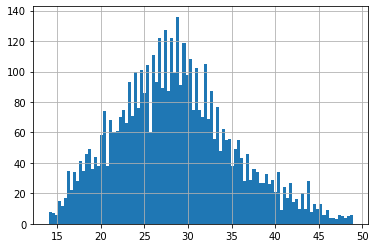

In [ ]:
datos['bmi'].hist(bins=100)
datos['bmi'].value_counts(sort=False)

Se puede apreciar en el histograma una forma de campana muy similar a una distribución norma, con los siguientes parámetros:

In [ ]:
media_glucosa = datos['bmi'].mean()
print("Valor de media:  ")
print(media_glucosa)
desviacion_glucosa = datos['bmi'].std()
print("Valor de desviación estándar:  ")
print(desviacion_glucosa)

Valor de media:  
28.5933455807308
Valor de desviación estándar:  
6.750978379345119


### 6.10) Histograma de estatus de fumador:


formerly smoked     857
never smoked       1827
smokes              770
Unknown            1445
Name: smoking_status, dtype: int64

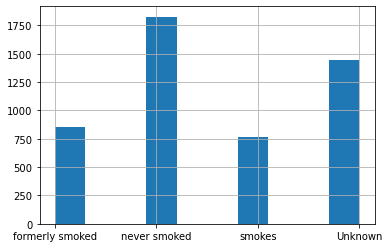

In [ ]:
datos['smoking_status'].hist(bins=10)
datos['smoking_status'].value_counts(sort=False)

### 6.11) Histograma de accidente cerebrovascular

1.0     245
0.0    4654
Name: stroke, dtype: int64

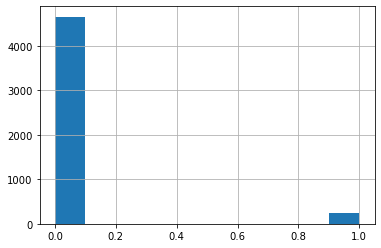

In [ ]:
datos['stroke'].hist(bins=10)
datos['stroke'].value_counts(sort=False)

# 7) Transformación de variables categóricas a numéricas

A continuación se realizará una transformación de las variables categóricas a valores numéricos. Esto permite tener un conjunto de datos con únicamente variables numéricas, lo cual hace posible la implementación de algoritmos de minería de datos.

En el siguiente fragmento de código se ejecuta un mapeo de variables, en el cual se asigna un valor numérico a cada uno de los posibles valores que toma cada variable categórica.

In [19]:
datos_numericos = datos.copy()
datos_numericos['gender'] = datos_numericos['gender'].astype('category').cat.codes
datos_numericos['ever_married'] = datos_numericos['ever_married'].astype('category').cat.codes
datos_numericos['work_type'] = datos_numericos['work_type'].astype('category').cat.codes
datos_numericos['Residence_type'] = datos_numericos['Residence_type'].astype('category').cat.codes
datos_numericos['smoking_status'] = datos_numericos['smoking_status'].astype('category').cat.codes
datos_numericos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.0,1.0,1,1,1,228.69,36.6,1,1.0
1,1,80.0,0.0,1.0,1,1,0,105.92,32.5,2,1.0
2,0,49.0,0.0,0.0,1,1,1,171.23,34.4,3,1.0
3,0,79.0,1.0,0.0,1,2,0,174.12,24.0,2,1.0
4,1,81.0,0.0,0.0,1,1,1,186.21,29.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0.0,0.0,0,1,0,70.15,29.8,1,0.0
4977,1,40.0,0.0,0.0,1,1,1,191.15,31.1,3,0.0
4978,0,45.0,1.0,0.0,1,0,0,95.02,31.8,3,0.0
4979,1,40.0,0.0,0.0,1,1,0,83.94,30.0,3,0.0


# Correlación entre los atributos

Con el fin de identificar posibles correlaciones entre los atributos del conjnto de datos, se procede a calcular la matriz de correlación.

In [ ]:
correlacion = datos_numericos.corr()
correlacion

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.018182,0.022324,0.087606,-0.023945,0.057921,-0.006781,0.057116,-0.005305,-0.056849,0.008707
age,-0.018182,1.000000,0.276734,0.265122,0.667458,-0.391450,0.020091,0.236533,0.355865,0.247389,0.246488
hypertension,0.022324,0.276734,1.000000,0.112105,0.161389,-0.055437,-0.006937,0.170087,0.156706,0.105899,0.130255
heart_disease,0.087606,0.265122,0.112105,1.000000,0.114484,-0.033502,0.001206,0.168399,0.058748,0.045293,0.131627
ever_married,-0.023945,0.667458,0.161389,0.114484,1.000000,-0.391085,0.009436,0.148800,0.361229,0.251289,0.105377
work_type,0.057921,-0.391450,-0.055437,-0.033502,-0.391085,1.000000,-0.006242,-0.055360,-0.366123,-0.342586,-0.037132
Residence_type,-0.006781,0.020091,-0.006937,0.001206,0.009436,-0.006242,1.000000,0.001287,0.015459,0.012115,0.015781
avg_glucose_level,0.057116,0.236533,0.170087,0.168399,0.148800,-0.055360,0.001287,1.000000,0.184919,0.063390,0.131930
bmi,-0.005305,0.355865,0.156706,0.058748,0.361229,-0.366123,0.015459,0.184919,1.000000,0.229374,0.054735
smoking_status,-0.056849,0.247389,0.105899,0.045293,0.251289,-0.342586,0.012115,0.063390,0.229374,1.000000,0.022673


No se encontraron valores de correlación muy cercanos a 1 o a -1 como para hacer eliminación de atributos.

# 8) Reducción de dimensionalidad


A continuación se realizará un procedimiento de reducción de dimensiones del conjunto de datos. Se hace una separación entre los datos de la clase y los demás atributos del conjunto de datos.

In [20]:
clase = datos_numericos["stroke"]
clase

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4976    0.0
4977    0.0
4978    0.0
4979    0.0
4980    0.0
Name: stroke, Length: 4899, dtype: float64

In [21]:
datos_sin_clase = datos_numericos.drop(['stroke'], axis = 1)
datos_sin_clase

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0.0,1.0,1,1,1,228.69,36.6,1
1,1,80.0,0.0,1.0,1,1,0,105.92,32.5,2
2,0,49.0,0.0,0.0,1,1,1,171.23,34.4,3
3,0,79.0,1.0,0.0,1,2,0,174.12,24.0,2
4,1,81.0,0.0,0.0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0.0,0.0,0,1,0,70.15,29.8,1
4977,1,40.0,0.0,0.0,1,1,1,191.15,31.1,3
4978,0,45.0,1.0,0.0,1,0,0,95.02,31.8,3
4979,1,40.0,0.0,0.0,1,1,0,83.94,30.0,3


Luego se realiza una normalización de los datos. En pruebas previas se determinó que el algoritmo PCA tiene un mejor desempeño en la varianza explicada acumulada cuando se realizó una normalización MinMax, comparada con tras normalizaciones como la Standard.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler



#normalizamos los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(datos_sin_clase)                                     # calculo la media para poder hacer la transformacion
datos_normalizados = scaler.transform(datos_sin_clase)          # Ahora si, escalo los datos y los normalizo
print(datos_normalizados)

[[1.         0.81481481 0.         ... 0.80126489 0.64756447 0.33333333]
 [1.         0.97530864 0.         ... 0.23451205 0.53008596 0.66666667]
 [0.         0.59259259 0.         ... 0.53600776 0.58452722 1.        ]
 ...
 [0.         0.54320988 1.         ... 0.18419352 0.51002865 1.        ]
 [1.         0.48148148 0.         ... 0.13304404 0.45845272 1.        ]
 [0.         0.97530864 1.         ... 0.13216693 0.43266476 0.66666667]]


In [ ]:
datos_sin_pca = datos_normalizados.copy()
pca=PCA(n_components=10)
pca.fit(datos_sin_pca) 
datos_pca=pca.transform(datos_sin_pca)
print("shape of X_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))

shape of X_pca (4899, 10)
[0.26000448 0.20484899 0.19908285 0.09412738 0.07280292 0.04720489
 0.04499768 0.03202087 0.02305383 0.02185611]
suma: 1.0000000000000002


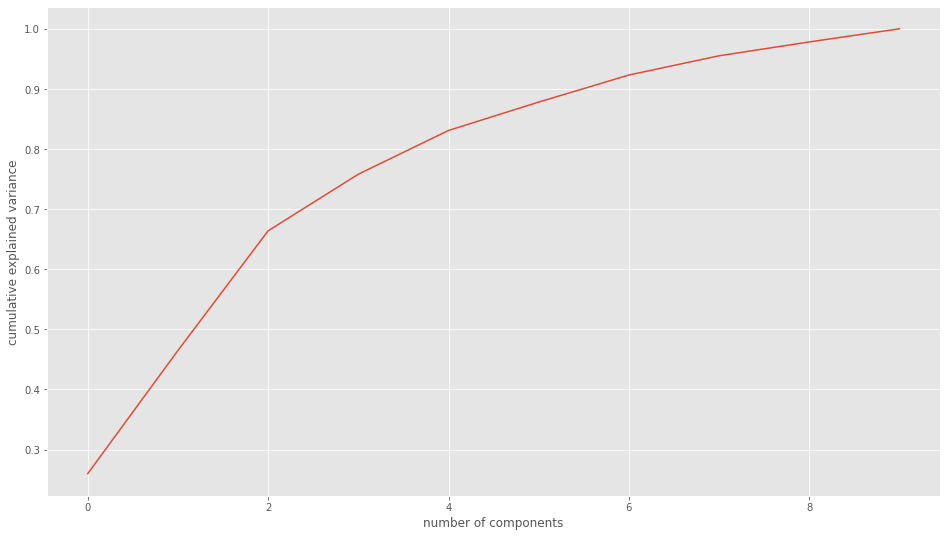

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Se puede apreciar que la varianza explicada acumulada cae por debajo del 90% para dimensiones menores a 7, lo cual nos indica que una reducción de dimensionalidad igual a 7 puede ser la adecuada para nuestro conjunto de datos. Así que se ejecutará dicha reducción.

In [ ]:
datos_sin_pca = datos_normalizados.copy()
pca=PCA(n_components=7)
pca.fit(datos_sin_pca) 
datos_pca=pca.transform(datos_sin_pca)
print("shape of X_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:7]))

shape of X_pca (4899, 7)
[0.26000448 0.20484899 0.19908285 0.09412738 0.07280292 0.04720489
 0.04499768]
suma: 0.9230691911488638


Se obtiene una varianza explicada acumulada de 92.3%.

Finalmente se grafica la proyección del conjunto de datos a  dos dimensiones, esto con el fin de ver si es viable realizar la predicción de accidente cerebro-vascular usando sólo dos dimensiones. De inicio se sabe que la varianza explicada acumulada para dos dimensiones es de tan solo el 46%, así que puede que no se logren los resultados esperados.

In [ ]:
datos_entrada= datos_normalizados.copy()
pca2 = PCA(n_components=2)
pca2.fit(datos_entrada)
datos_2_dimensiones = pca2.transform(datos_entrada)
print("shape of X_pca", datos_2_dimensiones.shape)
expl = pca2.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

shape of X_pca (4899, 2)
[0.26000448 0.20484899]
suma: 0.46485346176115794


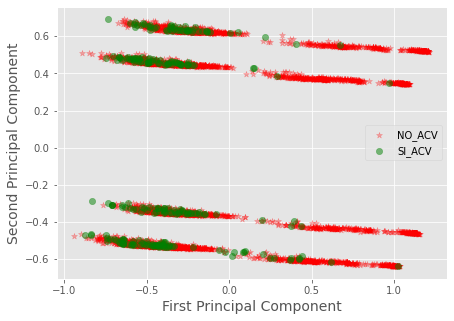

In [ ]:
Xax=datos_2_dimensiones[:,0]
Yax=datos_2_dimensiones[:,1]
labels=datos_numericos['stroke'].values
cdict={0:'red' ,1:'green'}
labl={0:'NO_ACV',1:'SI_ACV'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Se puede observar que los casos en los que hubo accidente cerebro-vascular se solapan con aquellos en los que no hubo, así que el uso de dos dimensiones no sirve para implementar algoritmos de predicción de existencia de accidente cerebro-vascular.

## 8.2) Uso de t-SNE

Con miras a encontrar un patrón de segmentación más claro que el obtenido usando PCA, se hace uso del algoritmo t-SNE.

In [ ]:
datos_sin_reduccion = datos_sin_pca.copy()

In [ ]:
from sklearn.manifold import TSNE
X_reducido = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(datos_sin_reduccion)
X_reducido

array([[-104.807915,  -13.403094],
       [-102.86483 ,   16.471529],
       [ -20.947493,   60.723064],
       ...,
       [  16.70516 , -102.39342 ],
       [ -46.06298 ,  -24.065702],
       [ -71.51201 ,   27.99895 ]], dtype=float32)

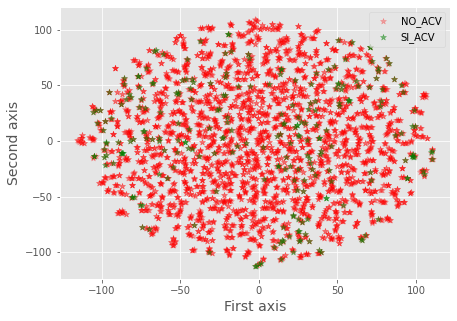

In [ ]:
Xax=X_reducido[:,0]
Yax=X_reducido[:,1]
labels=datos_numericos['stroke'].values
cdict={0:'red' ,1:'green'}
labl={0:'NO_ACV',1:'SI_ACV'}
marker={0:'*',1:'*'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First axis",fontsize=14)
plt.ylabel("Second axis",fontsize=14)
plt.legend()
plt.show()

Se observa que no existe una separacuón clara entre los datos con No_ACV y aquellos con Si_ACV. No sería apropiado aplicar técnicas de clustering en nu conjunto de datos reducido a dos dimensiones.

# 9) Tratamiento del conjunto de datos para realizar asociación


### 9.1) Discretización de variables numéricas

Ya que naturalmente los algoritmos de asociación trabajan con datos categóricos, se hace necesario discretizar las variables numéricas. Para ello, se usa una función de Python con la cual se establecen los intervalos en los que se quiere discretizar las siguientes variables numéricas: 'age', 'avg_glucose_level' y 'bmi'.

Para la columna 'age', se hace una discretización teniendo en cuenta la clasificación sugerida por la OMS de las etapas de la vida humana según desarrollo y deterioro biológico, asignando las siguientes categorías: Infancia y niñez de 0 a 12 años, Adolescencia de 12 a 20 años, Adultez joven de 20 a 40 años, Adultez intermedia de 40 a 50 años, Adultez tardía de 50 a 60 años, Senectud de 60 a 70 años, Vejez de 70 a 80 años, y Grandes anciamos por encima de los 80 años.

Se realiza esta clasificación basada en criterios médicos, con el fin de dar un sentido biológico y del desarrollo humano a las asociaciones que se puedan encontrar entre la edad y las demás dimensiones del conjunto de datos.

Infancia_y_niñez       524
Adolescencia           409
Adultez_joven         1180
Adultez_intermedia     705
Adultez_tardía         790
Senectud               581
Vejez                  594
Grandes ancianos       116
Name: age, dtype: int64

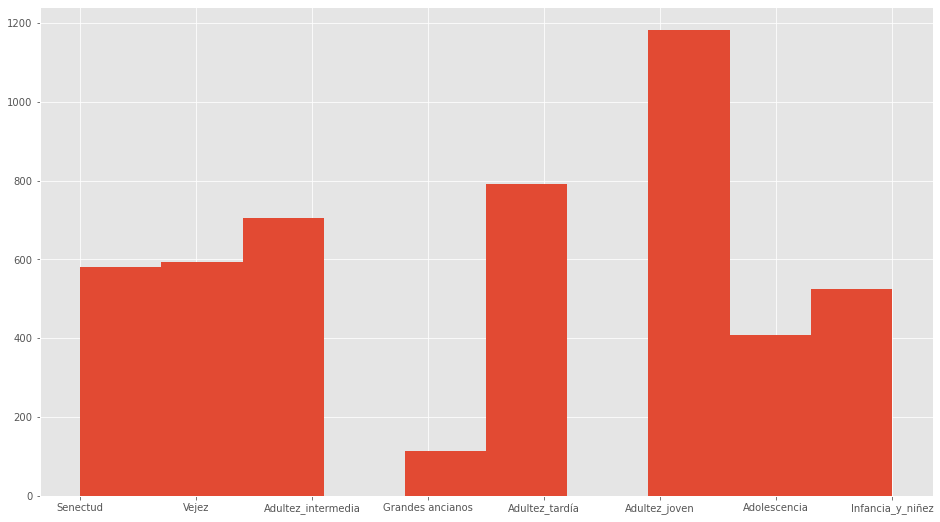

In [ ]:
datos_asociacion = datos.copy()
datos_asociacion['age']=pd.cut(x=datos_asociacion['age'], bins=[0,12,20,40,50,60,70,80,88],labels=["Infancia_y_niñez", "Adolescencia", "Adultez_joven", "Adultez_intermedia", "Adultez_tardía", "Senectud", "Vejez", "Grandes ancianos"])
datos_asociacion['age'].hist()
datos_asociacion['age'].value_counts(sort=False)

Ahora se discretizará la columna 'avg_glucose_level'. Para ello se toman las clasficaciones del nivel de glucosa en sangre en ayunas que se sugiere en la literatura médica.

Se tiene la siguiente clasificación: 'Hipoglicemia' entre 50 y 70, 'Glucosa_normal' entre 70 y 108, 'Prediabetes' entre 108 y 125, y 'Diabetes' por encima de 125.

Se realiza una clasificación con base en criterios médicos con el fin de dar un sentido a las posibles asociaciones que se puedan presentar.

Hipoglicemia       721
Glucosa_normal    2695
Prediabetes        529
Diabetes           954
Name: avg_glucose_level, dtype: int64

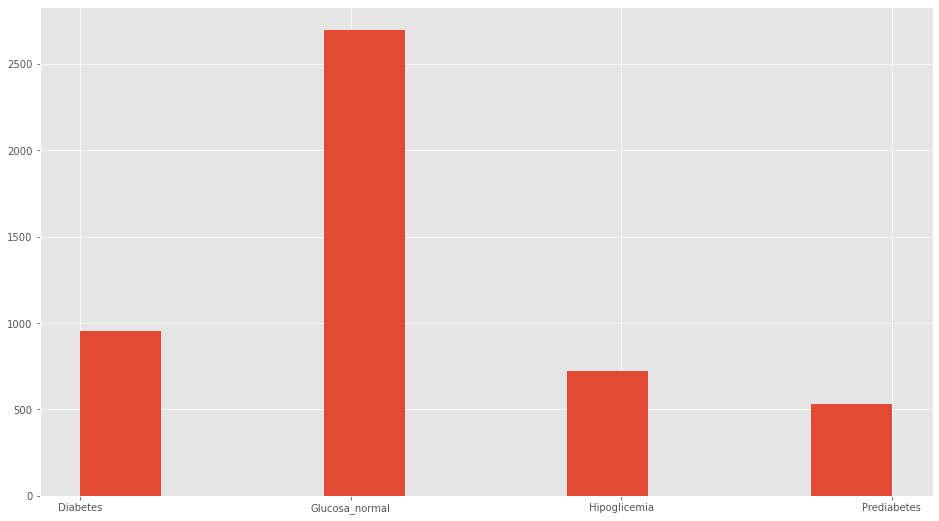

In [ ]:
datos_asociacion['avg_glucose_level']=pd.cut(x=datos_asociacion['avg_glucose_level'], bins=[50,70,108,125,300],labels=["Hipoglicemia", "Glucosa_normal", "Prediabetes", "Diabetes"])
datos_asociacion['avg_glucose_level'].hist()
datos_asociacion['avg_glucose_level'].value_counts(sort=False)

A continuación se discretizará la columna correspondiente a 'bmi'. Nuevamente se toma en cuenta la clasificación según Índice de Masa Corporal de la siguiente forma: 'Delgadez_severa' por debajo de 16, 'Delgadez_moderada' entre 16 y 17, 'Delgadez_leve' entre 17 y 18.5, 'Peso_normal' entre 18.5 y 25, 'Sobrepeso' entre 25 y 30, 'Obesidad_leve' entre 30 y 35, 'Obesidad_media' entre 35 y 40, y 'Obesidad mórbida' por encima de 40.

Delgadez_severa        65
Delgadez_moderada      79
Delgadez_leve         162
Peso_normal          1230
Sobrepeso            1492
Obesidad_leve        1057
Obesidad_media        499
Obesidad_morbida      315
Name: bmi, dtype: int64

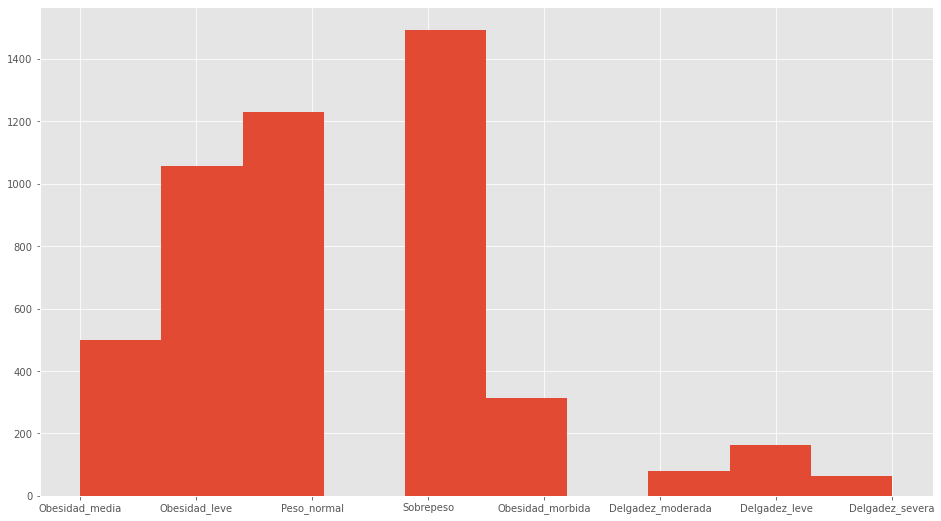

In [ ]:
datos_asociacion['bmi']=pd.cut(x=datos_asociacion['bmi'], bins=[13,16,17,18.5,25,30,35,40,50],labels=["Delgadez_severa", "Delgadez_moderada", "Delgadez_leve", "Peso_normal", "Sobrepeso", "Obesidad_leve", "Obesidad_media", "Obesidad_morbida"])
datos_asociacion['bmi'].hist()
datos_asociacion['bmi'].value_counts(sort=False)

El conjunto de datos ahora luce así:


In [ ]:
datos_asociacion

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senectud,0.0,1.0,Yes,Private,Urban,Diabetes,Obesidad_media,formerly smoked,1.0
1,Male,Vejez,0.0,1.0,Yes,Private,Rural,Glucosa_normal,Obesidad_leve,never smoked,1.0
2,Female,Adultez_intermedia,0.0,0.0,Yes,Private,Urban,Diabetes,Obesidad_leve,smokes,1.0
3,Female,Vejez,1.0,0.0,Yes,Self-employed,Rural,Diabetes,Peso_normal,never smoked,1.0
4,Male,Grandes ancianos,0.0,0.0,Yes,Private,Urban,Diabetes,Sobrepeso,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,Adultez_intermedia,0.0,0.0,No,Private,Rural,Glucosa_normal,Sobrepeso,formerly smoked,0.0
4977,Male,Adultez_joven,0.0,0.0,Yes,Private,Urban,Diabetes,Obesidad_leve,smokes,0.0
4978,Female,Adultez_intermedia,1.0,0.0,Yes,Govt_job,Rural,Glucosa_normal,Obesidad_leve,smokes,0.0
4979,Male,Adultez_joven,0.0,0.0,Yes,Private,Rural,Glucosa_normal,Sobrepeso,smokes,0.0


### 9.2) Tratamiento de variables binarias

En el caso de variables binarias es mucho más sencillo hacer la discretización ya que un valor de "0" en la variable representa una etiqueta, mientras que el valor de "1" representa la otra etiqueta.

Para la columna de hipertensión se realiza la asignación de las etiquetas correspondientes:

No_hipertension    4423
Si_hipertension     476
Name: hypertension, dtype: int64

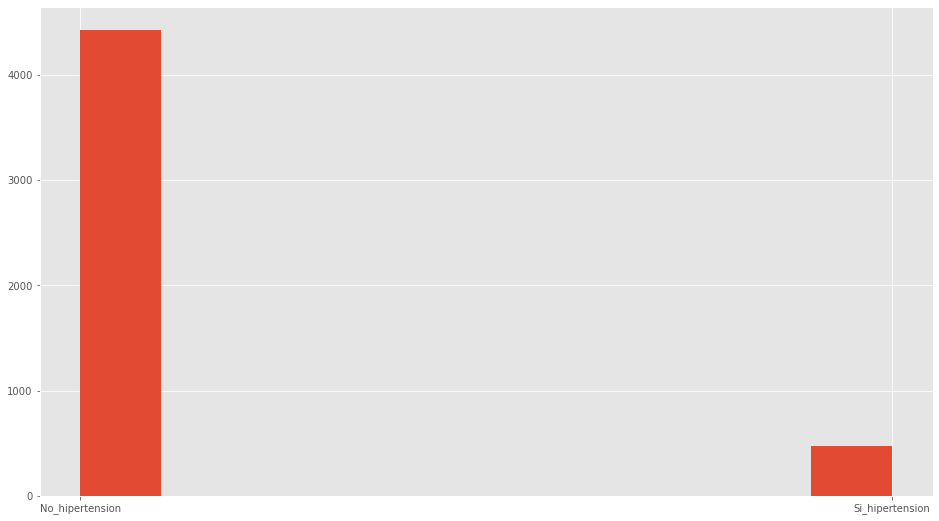

In [ ]:
datos_asociacion['hypertension']=pd.cut(x=datos_asociacion['hypertension'], bins=[-1,0,1],labels=["No_hipertension", "Si_hipertension"])
datos_asociacion['hypertension'].hist()
datos_asociacion['hypertension'].value_counts(sort=False)

Para la columna correspondiente a enfermedad del corazón se realiza un procedimiento similar:

No_enfermedad_corazon    4625
Si_enfermedad_corazon     274
Name: heart_disease, dtype: int64

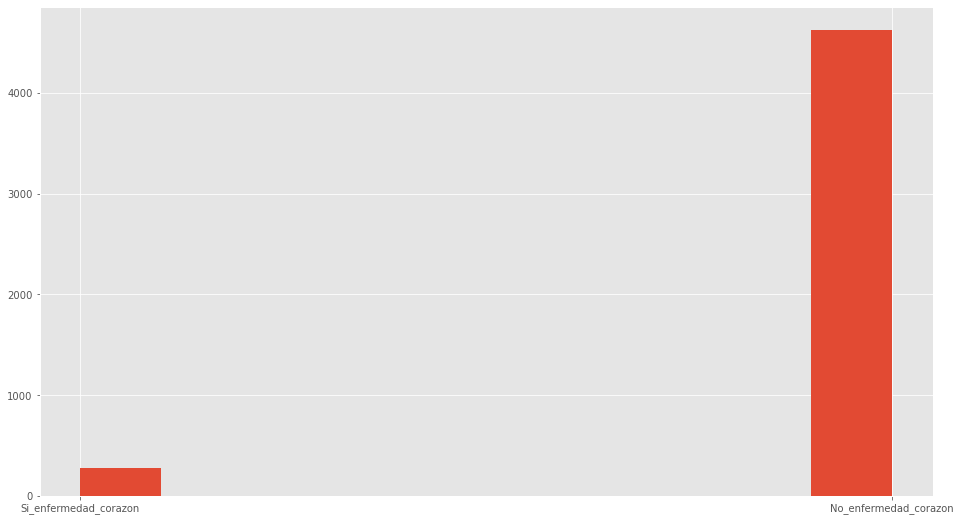

In [ ]:
datos_asociacion['heart_disease']=pd.cut(x=datos_asociacion['heart_disease'], bins=[-1,0,1],labels=["No_enfermedad_corazon", "Si_enfermedad_corazon"])
datos_asociacion['heart_disease'].hist()
datos_asociacion['heart_disease'].value_counts(sort=False)

Finalmente se le asignan las etiquetas a la columna correspondiente a la clase, cuyo nombre en el dataframe es 'stroke' y representa si la persona en cuestión ha sufrido de accidente cerebrovascular.

No_ACV    4654
Si_ACV     245
Name: stroke, dtype: int64

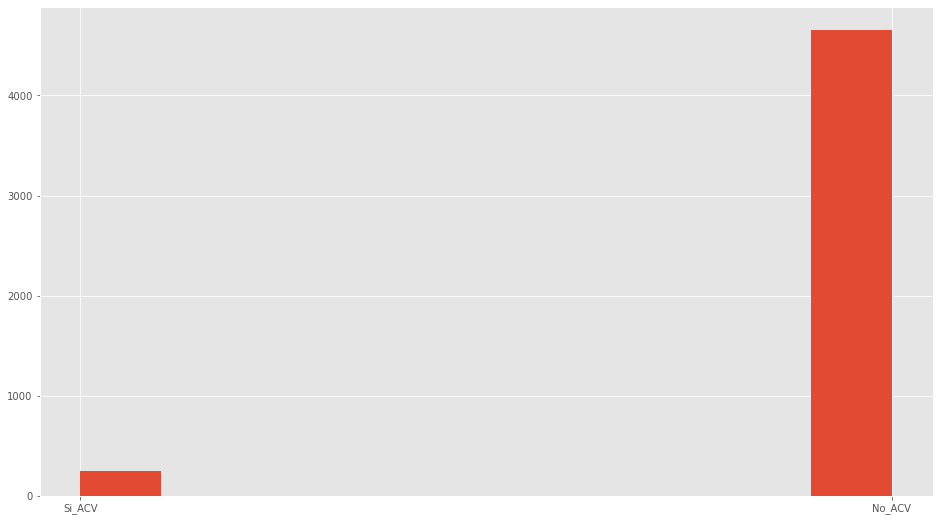

In [ ]:
datos_asociacion['stroke']=pd.cut(x=datos_asociacion['stroke'], bins=[-1,0,1],labels=["No_ACV", "Si_ACV"])
datos_asociacion['stroke'].hist()
datos_asociacion['stroke'].value_counts(sort=False)

Ya se tienen todas las variables numéricas y binarias ya en forma categórica, luciendo el dataset así:

In [ ]:
datos_asociacion

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senectud,No_hipertension,Si_enfermedad_corazon,Yes,Private,Urban,Diabetes,Obesidad_media,formerly smoked,Si_ACV
1,Male,Vejez,No_hipertension,Si_enfermedad_corazon,Yes,Private,Rural,Glucosa_normal,Obesidad_leve,never smoked,Si_ACV
2,Female,Adultez_intermedia,No_hipertension,No_enfermedad_corazon,Yes,Private,Urban,Diabetes,Obesidad_leve,smokes,Si_ACV
3,Female,Vejez,Si_hipertension,No_enfermedad_corazon,Yes,Self-employed,Rural,Diabetes,Peso_normal,never smoked,Si_ACV
4,Male,Grandes ancianos,No_hipertension,No_enfermedad_corazon,Yes,Private,Urban,Diabetes,Sobrepeso,formerly smoked,Si_ACV
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,Adultez_intermedia,No_hipertension,No_enfermedad_corazon,No,Private,Rural,Glucosa_normal,Sobrepeso,formerly smoked,No_ACV
4977,Male,Adultez_joven,No_hipertension,No_enfermedad_corazon,Yes,Private,Urban,Diabetes,Obesidad_leve,smokes,No_ACV
4978,Female,Adultez_intermedia,Si_hipertension,No_enfermedad_corazon,Yes,Govt_job,Rural,Glucosa_normal,Obesidad_leve,smokes,No_ACV
4979,Male,Adultez_joven,No_hipertension,No_enfermedad_corazon,Yes,Private,Rural,Glucosa_normal,Sobrepeso,smokes,No_ACV


### 9.3) Re-etiquetado de variables

Ya que los elementos de las dimensiones de estado civil y tipo de trabajo no tienen una referencia de la columna a la que se refiere dicha información, a continuación se re-etiquietarán dichas variables, de tal forma que ahora será explícita la información que contienen.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\2460349084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['ever_married'][i] = 'Casado'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\2460349084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['ever_married'][i] = 'No_casado'


Casado       3257
No_casado    1642
Name: ever_married, dtype: int64

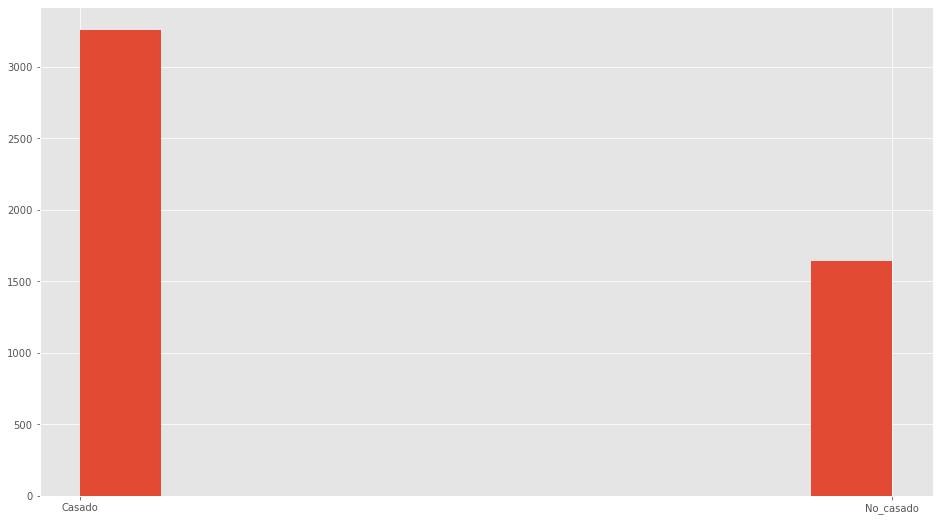

In [ ]:
total = datos_asociacion.shape[0]
for i in datos_asociacion.index:
    if datos_asociacion['ever_married'][i] == 'Yes':
        datos_asociacion['ever_married'][i] = 'Casado'
    elif datos_asociacion['ever_married'][i] == 'No':
        datos_asociacion['ever_married'][i] = 'No_casado'

datos_asociacion['ever_married'].hist()
datos_asociacion['ever_married'].value_counts(sort=False)

        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\3774318431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['work_type'][i] = 'Trabajo_privado'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\3774318431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['work_type'][i] = 'Auto-empleado'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\3774318431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trabajo_privado     2840
Auto-empleado        801
Trabajo_gobierno     635
Menor_edad           623
Name: work_type, dtype: int64

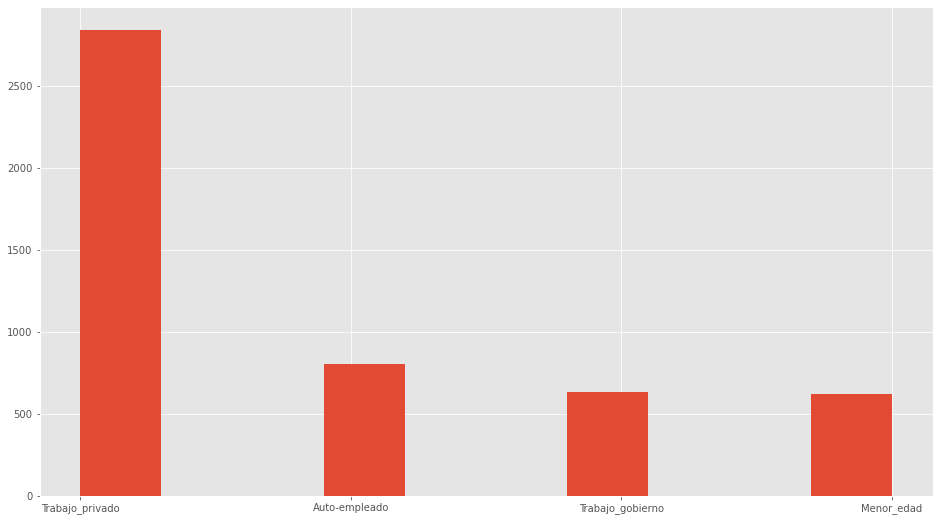

In [ ]:
for i in datos_asociacion.index:
    if datos_asociacion['work_type'][i] == 'Private':
        datos_asociacion['work_type'][i] = 'Trabajo_privado'
    elif datos_asociacion['work_type'][i] == 'Self-employed':
        datos_asociacion['work_type'][i] = 'Auto-empleado'
    elif datos_asociacion['work_type'][i] == 'Govt_job':
        datos_asociacion['work_type'][i] = 'Trabajo_gobierno'
    elif datos_asociacion['work_type'][i] == 'children':
        datos_asociacion['work_type'][i] = 'Menor_edad'

datos_asociacion['work_type'].hist()
datos_asociacion['work_type'].value_counts(sort=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\2866655736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['Residence_type'][i] = 'Residencia_urbana'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\2866655736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_asociacion['Residence_type'][i] = 'Residencia_rural'


Residencia_urbana    2491
Residencia_rural     2408
Name: Residence_type, dtype: int64

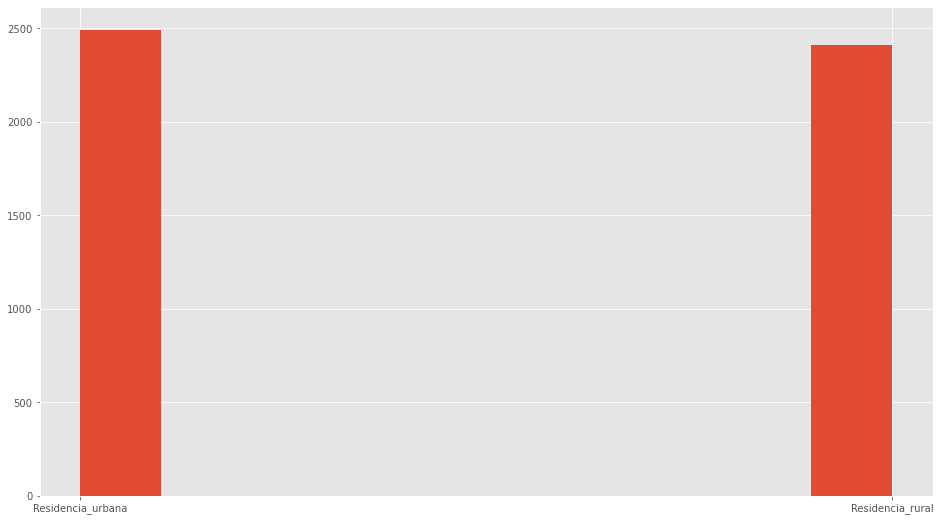

In [ ]:
for i in datos_asociacion.index:
    if datos_asociacion['Residence_type'][i] == 'Urban':
        datos_asociacion['Residence_type'][i] = 'Residencia_urbana'
    elif datos_asociacion['Residence_type'][i] == 'Rural':
        datos_asociacion['Residence_type'][i] = 'Residencia_rural'


datos_asociacion['Residence_type'].hist()
datos_asociacion['Residence_type'].value_counts(sort=False)

In [ ]:
datos_asociacion

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senectud,No_hipertension,Si_enfermedad_corazon,Casado,Trabajo_privado,Residencia_urbana,Diabetes,Obesidad_media,formerly smoked,Si_ACV
1,Male,Vejez,No_hipertension,Si_enfermedad_corazon,Casado,Trabajo_privado,Residencia_rural,Glucosa_normal,Obesidad_leve,never smoked,Si_ACV
2,Female,Adultez_intermedia,No_hipertension,No_enfermedad_corazon,Casado,Trabajo_privado,Residencia_urbana,Diabetes,Obesidad_leve,smokes,Si_ACV
3,Female,Vejez,Si_hipertension,No_enfermedad_corazon,Casado,Auto-empleado,Residencia_rural,Diabetes,Peso_normal,never smoked,Si_ACV
4,Male,Grandes ancianos,No_hipertension,No_enfermedad_corazon,Casado,Trabajo_privado,Residencia_urbana,Diabetes,Sobrepeso,formerly smoked,Si_ACV
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,Adultez_intermedia,No_hipertension,No_enfermedad_corazon,No_casado,Trabajo_privado,Residencia_rural,Glucosa_normal,Sobrepeso,formerly smoked,No_ACV
4977,Male,Adultez_joven,No_hipertension,No_enfermedad_corazon,Casado,Trabajo_privado,Residencia_urbana,Diabetes,Obesidad_leve,smokes,No_ACV
4978,Female,Adultez_intermedia,Si_hipertension,No_enfermedad_corazon,Casado,Trabajo_gobierno,Residencia_rural,Glucosa_normal,Obesidad_leve,smokes,No_ACV
4979,Male,Adultez_joven,No_hipertension,No_enfermedad_corazon,Casado,Trabajo_privado,Residencia_rural,Glucosa_normal,Sobrepeso,smokes,No_ACV


# 10) Aplicación de algoritmos de asociación

### 10.1) Algoritmo de asociación Apriori

En un principio es necesario convertir el dataframe del conjunto de datos a una lista de grupos de etiquetas, ya que las librerías encargadas de hacer asociación en Python reciben como entrada este formato.

In [ ]:
datos_asociacion_lista = datos_asociacion.copy()
datos_asociacion_lista = datos_asociacion.values.tolist()
datos_asociacion_lista

[['Male',
  'Senectud',
  'No_hipertension',
  'Si_enfermedad_corazon',
  'Casado',
  'Trabajo_privado',
  'Residencia_urbana',
  'Diabetes',
  'Obesidad_media',
  'formerly smoked',
  'Si_ACV'],
 ['Male',
  'Vejez',
  'No_hipertension',
  'Si_enfermedad_corazon',
  'Casado',
  'Trabajo_privado',
  'Residencia_rural',
  'Glucosa_normal',
  'Obesidad_leve',
  'never smoked',
  'Si_ACV'],
 ['Female',
  'Adultez_intermedia',
  'No_hipertension',
  'No_enfermedad_corazon',
  'Casado',
  'Trabajo_privado',
  'Residencia_urbana',
  'Diabetes',
  'Obesidad_leve',
  'smokes',
  'Si_ACV'],
 ['Female',
  'Vejez',
  'Si_hipertension',
  'No_enfermedad_corazon',
  'Casado',
  'Auto-empleado',
  'Residencia_rural',
  'Diabetes',
  'Peso_normal',
  'never smoked',
  'Si_ACV'],
 ['Male',
  'Grandes ancianos',
  'No_hipertension',
  'No_enfermedad_corazon',
  'Casado',
  'Trabajo_privado',
  'Residencia_urbana',
  'Diabetes',
  'Sobrepeso',
  'formerly smoked',
  'Si_ACV'],
 ['Male',
  'Vejez',
  'Si_

Luego, se procede a hacer uso de la librería efficient_apriori de Python con la cual, dados valores umbrales de soporte y confianza, el algoritmo extrae tanto la lista de itemsets frecuentes como las reglas de asociación derivadas de dichos itemsets.


Se realizó una exploración de los resultados del algoritmo para distintos valores de soporte y confianza umbral. Cuando se hizo uso de soportes por debajo del 30% se obtuvo una gran cantidad de itemsets, muchos de ellos con reglas poco interesantes y, debido a la gran cantidad de datos, resultaría muy tedioso analizar todos los itemsets y reglas de asociación resultantes.

Así que establece un umbral de soporte igual al 30% y una confianza umbral igual al 80%

In [ ]:
from efficient_apriori import apriori
itemsets_apriori, rules_apriori = apriori(datos_asociacion_lista, min_support=0.3,  min_confidence=0.8)
print(itemsets_apriori)

{1: {('Male',): 2028, ('No_hipertension',): 4423, ('Casado',): 3257, ('Trabajo_privado',): 2840, ('Residencia_urbana',): 2491, ('Residencia_rural',): 2408, ('Glucosa_normal',): 2695, ('never smoked',): 1827, ('Female',): 2871, ('No_enfermedad_corazon',): 4625, ('Sobrepeso',): 1492, ('No_casado',): 1642, ('No_ACV',): 4654}, 2: {('Casado', 'Female'): 1936, ('Casado', 'Glucosa_normal'): 1727, ('Casado', 'No_ACV'): 3041, ('Casado', 'No_enfermedad_corazon'): 3014, ('Casado', 'No_hipertension'): 2830, ('Casado', 'Residencia_rural'): 1590, ('Casado', 'Residencia_urbana'): 1667, ('Casado', 'Trabajo_privado'): 2043, ('Female', 'Glucosa_normal'): 1614, ('Female', 'No_ACV'): 2732, ('Female', 'No_enfermedad_corazon'): 2759, ('Female', 'No_hipertension'): 2608, ('Female', 'Trabajo_privado'): 1690, ('Glucosa_normal', 'No_ACV'): 2594, ('Glucosa_normal', 'No_enfermedad_corazon'): 2584, ('Glucosa_normal', 'No_hipertension'): 2495, ('Glucosa_normal', 'Trabajo_privado'): 1571, ('Male', 'No_ACV'): 1922, (

In [ ]:
print(rules_apriori)

[{Casado} -> {No_ACV}, {Casado} -> {No_enfermedad_corazon}, {Casado} -> {No_hipertension}, {Female} -> {No_ACV}, {Female} -> {No_enfermedad_corazon}, {Female} -> {No_hipertension}, {Glucosa_normal} -> {No_ACV}, {Glucosa_normal} -> {No_enfermedad_corazon}, {Glucosa_normal} -> {No_hipertension}, {Male} -> {No_ACV}, {Male} -> {No_enfermedad_corazon}, {Male} -> {No_hipertension}, {No_casado} -> {No_ACV}, {No_enfermedad_corazon} -> {No_ACV}, {No_ACV} -> {No_enfermedad_corazon}, {No_hipertension} -> {No_ACV}, {No_ACV} -> {No_hipertension}, {Residencia_rural} -> {No_ACV}, {Residencia_urbana} -> {No_ACV}, {Trabajo_privado} -> {No_ACV}, {never smoked} -> {No_ACV}, {No_casado} -> {No_enfermedad_corazon}, {No_casado} -> {No_hipertension}, {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension}, {Residencia_rural} -> {No_enfermedad_corazon}, {Residencia_urbana} -> {No_enfermedad_corazon}, {Trabajo_privado} -> {No_enfermedad_corazon}, {never smoked} -> {No_enferme

Algunas reglas que se obtienen del algoritmo son las siguientes:


{Female, No_ACV, Trabajo_privado} -> {No_hipertension}

{Glucosa_normal, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, Residencia_rural} -> {No_ACV}

{No_ACV, never smoked} -> {No_hipertension}

{No_hipertension, Residencia_rural} -> {No_enfermedad_corazon}

{Casado, Female, No_enfermedad_corazon} -> {No_ACV}

{Casado, Glucosa_normal, No_hipertension} -> {No_ACV}

{Casado, No_enfermedad_corazon, Trabajo_privado} -> {No_ACV}

{Male, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_ACV, No_hipertension, Trabajo_privado} -> {No_enfermedad_corazon}

Muchas de ellas son redundantes e intuitivas, a lo que se le suma el bajo valor de soporte.

Adicionalmente, el algoritmo no extrajo ninguna regla relacionada a Si_ACV.
Esto se puede explicar debido a que existen 20 veces menos registros para Si_ACV comparado con No_ACV. Por tanto, es necesario hacer asociación separando los registros en dos grupos: cuando existe ACV y cuando no existe ACV.

### 10.1.1) Separación de datos por clase

In [ ]:
total = len(datos_asociacion_lista)
datos_Si_ACV = []
datos_No_ACV = []
for i in range(0,total):
    if clase[i] == 1:
        datos_Si_ACV.append(datos_asociacion_lista[i])
    elif clase[i] == 0:
        datos_No_ACV.append(datos_asociacion_lista[i])

### 10.1.2) Asociación para la clase Si_ACV

Se hará uso de las librerías de efficient_apriori para aquellos datos con la clase Si_ACV.

Se empieza con un valor de soporte del 30% con una confianza del 80%.

In [ ]:
itemsets_apriori, rules_apriori = apriori(datos_Si_ACV, min_support=0.3,  min_confidence=0.8)
print(itemsets_apriori)

{1: {('Male',): 106, ('No_hipertension',): 180, ('Casado',): 216, ('Trabajo_privado',): 146, ('Residencia_urbana',): 133, ('Diabetes',): 98, ('Si_ACV',): 245, ('Vejez',): 105, ('Residencia_rural',): 112, ('Glucosa_normal',): 101, ('never smoked',): 89, ('Female',): 139, ('No_enfermedad_corazon',): 199, ('Sobrepeso',): 99}, 2: {('Casado', 'Diabetes'): 92, ('Casado', 'Female'): 118, ('Casado', 'Glucosa_normal'): 84, ('Casado', 'Male'): 98, ('Casado', 'No_enfermedad_corazon'): 177, ('Casado', 'No_hipertension'): 162, ('Casado', 'Residencia_rural'): 104, ('Casado', 'Residencia_urbana'): 112, ('Casado', 'Si_ACV'): 216, ('Casado', 'Sobrepeso'): 89, ('Casado', 'Trabajo_privado'): 132, ('Casado', 'Vejez'): 92, ('Casado', 'never smoked'): 74, ('Diabetes', 'Si_ACV'): 98, ('Female', 'No_enfermedad_corazon'): 120, ('Female', 'No_hipertension'): 100, ('Female', 'Residencia_urbana'): 76, ('Female', 'Si_ACV'): 139, ('Female', 'Trabajo_privado'): 74, ('Glucosa_normal', 'No_enfermedad_corazon'): 92, ('

In [ ]:
print(rules_apriori)

[{Diabetes} -> {Casado}, {Female} -> {Casado}, {Glucosa_normal} -> {Casado}, {Male} -> {Casado}, {No_enfermedad_corazon} -> {Casado}, {Casado} -> {No_enfermedad_corazon}, {No_hipertension} -> {Casado}, {Residencia_rural} -> {Casado}, {Residencia_urbana} -> {Casado}, {Si_ACV} -> {Casado}, {Casado} -> {Si_ACV}, {Sobrepeso} -> {Casado}, {Trabajo_privado} -> {Casado}, {Vejez} -> {Casado}, {never smoked} -> {Casado}, {Diabetes} -> {Si_ACV}, {Female} -> {No_enfermedad_corazon}, {Female} -> {Si_ACV}, {Glucosa_normal} -> {No_enfermedad_corazon}, {Glucosa_normal} -> {No_hipertension}, {Glucosa_normal} -> {Si_ACV}, {Male} -> {Si_ACV}, {No_hipertension} -> {No_enfermedad_corazon}, {Residencia_rural} -> {No_enfermedad_corazon}, {Si_ACV} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {Si_ACV}, {Sobrepeso} -> {No_enfermedad_corazon}, {Vejez} -> {No_enfermedad_corazon}, {never smoked} -> {No_enfermedad_corazon}, {No_hipertension} -> {Si_ACV}, {Residencia_rural} -> {Si_ACV}, {Residencia_urbana

{Diabetes} -> {Si_ACV}

{Sobrepeso} -> {Si_ACV}

{Vejez} -> {Si_ACV}

{Female, Residencia_urbana} -> {Si_ACV}

{Female, Trabajo_privado} -> {Si_ACV}

{Si_hipertension, Vejez} -> {Si_ACV} ***

{Casado, Si_enfermedad_corazon, Residencia_urbana} -> {Si_ACV} ***

{Residencia_urbana} -> {Si_ACV}

{Casado, Si_enfermedad_corazon} -> {Si_ACV}

{No_enfermedad_corazon, No_hipertension} -> {Si_ACV} ***

Ahora se fija un soporte de 50% con una confianza del 80%

In [ ]:
itemsets_apriori, rules_apriori = apriori(datos_Si_ACV, min_support=0.5,  min_confidence=0.8)
print(itemsets_apriori)

{1: {('No_hipertension',): 180, ('Casado',): 216, ('Trabajo_privado',): 146, ('Residencia_urbana',): 133, ('Si_ACV',): 245, ('Female',): 139, ('No_enfermedad_corazon',): 199}, 2: {('Casado', 'No_enfermedad_corazon'): 177, ('Casado', 'No_hipertension'): 162, ('Casado', 'Si_ACV'): 216, ('Casado', 'Trabajo_privado'): 132, ('Female', 'Si_ACV'): 139, ('No_enfermedad_corazon', 'No_hipertension'): 147, ('No_enfermedad_corazon', 'Si_ACV'): 199, ('No_hipertension', 'Si_ACV'): 180, ('Residencia_urbana', 'Si_ACV'): 133, ('Si_ACV', 'Trabajo_privado'): 146}, 3: {('Casado', 'No_enfermedad_corazon', 'No_hipertension'): 132, ('Casado', 'No_enfermedad_corazon', 'Si_ACV'): 177, ('Casado', 'No_hipertension', 'Si_ACV'): 162, ('Casado', 'Si_ACV', 'Trabajo_privado'): 132, ('No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'): 147}, 4: {('Casado', 'No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'): 132}}


In [ ]:
print(rules_apriori)

[{No_enfermedad_corazon} -> {Casado}, {Casado} -> {No_enfermedad_corazon}, {No_hipertension} -> {Casado}, {Si_ACV} -> {Casado}, {Casado} -> {Si_ACV}, {Trabajo_privado} -> {Casado}, {Female} -> {Si_ACV}, {No_hipertension} -> {No_enfermedad_corazon}, {Si_ACV} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {Si_ACV}, {No_hipertension} -> {Si_ACV}, {Residencia_urbana} -> {Si_ACV}, {Trabajo_privado} -> {Si_ACV}, {No_enfermedad_corazon, No_hipertension} -> {Casado}, {Casado, No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon, Si_ACV} -> {Casado}, {Casado, Si_ACV} -> {No_enfermedad_corazon}, {Casado, No_enfermedad_corazon} -> {Si_ACV}, {No_enfermedad_corazon} -> {Casado, Si_ACV}, {Casado} -> {No_enfermedad_corazon, Si_ACV}, {No_hipertension, Si_ACV} -> {Casado}, {Casado, No_hipertension} -> {Si_ACV}, {No_hipertension} -> {Casado, Si_ACV}, {Si_ACV, Trabajo_privado} -> {Casado}, {Casado, Trabajo_privado} -> {Si_ACV}, {Trabajo_privado} -> {Casado, Si_ACV}, {No_hipertensio

Se destacan las siguientes reglas:

{Casado} -> {Si_ACV}

{Female} -> {Si_ACV}

{Residencia_urbana} -> {Si_ACV}

{Casado, Si_enfermedad_corazon} -> {Si_ACV}

{Casado, No_enfermedad_corazon, No_hipertension} -> {Si_ACV}

### 10.1.3) Asociación para la clase No_ACV

Se hará uso de las librerías de efficient_apriori para aquellos datos con la clase No_ACV.

In [ ]:
itemsets_apriori, rules_apriori = apriori(datos_No_ACV, min_support=0.3,  min_confidence=0.8)
print(itemsets_apriori)

{1: {('Male',): 1922, ('No_hipertension',): 4243, ('Casado',): 3041, ('Trabajo_privado',): 2694, ('Residencia_rural',): 2296, ('No_ACV',): 4654, ('No_enfermedad_corazon',): 4426, ('No_casado',): 1613, ('Glucosa_normal',): 2594, ('Unknown',): 1398, ('Residencia_urbana',): 2358, ('never smoked',): 1738, ('Female',): 2732}, 2: {('Casado', 'Female'): 1818, ('Casado', 'Glucosa_normal'): 1643, ('Casado', 'No_ACV'): 3041, ('Casado', 'No_enfermedad_corazon'): 2837, ('Casado', 'No_hipertension'): 2668, ('Casado', 'Residencia_rural'): 1486, ('Casado', 'Residencia_urbana'): 1555, ('Casado', 'Trabajo_privado'): 1911, ('Female', 'Glucosa_normal'): 1554, ('Female', 'No_ACV'): 2732, ('Female', 'No_enfermedad_corazon'): 2639, ('Female', 'No_hipertension'): 2508, ('Female', 'Trabajo_privado'): 1616, ('Glucosa_normal', 'No_ACV'): 2594, ('Glucosa_normal', 'No_enfermedad_corazon'): 2492, ('Glucosa_normal', 'No_hipertension'): 2414, ('Glucosa_normal', 'Trabajo_privado'): 1509, ('Male', 'No_ACV'): 1922, ('M

In [ ]:
print(rules_apriori)

[{Casado} -> {No_ACV}, {Casado} -> {No_enfermedad_corazon}, {Casado} -> {No_hipertension}, {Female} -> {No_ACV}, {Female} -> {No_enfermedad_corazon}, {Female} -> {No_hipertension}, {Glucosa_normal} -> {No_ACV}, {Glucosa_normal} -> {No_enfermedad_corazon}, {Glucosa_normal} -> {No_hipertension}, {Male} -> {No_ACV}, {Male} -> {No_enfermedad_corazon}, {Male} -> {No_hipertension}, {No_casado} -> {No_ACV}, {No_enfermedad_corazon} -> {No_ACV}, {No_ACV} -> {No_enfermedad_corazon}, {No_hipertension} -> {No_ACV}, {No_ACV} -> {No_hipertension}, {Residencia_rural} -> {No_ACV}, {Residencia_urbana} -> {No_ACV}, {Trabajo_privado} -> {No_ACV}, {Unknown} -> {No_ACV}, {never smoked} -> {No_ACV}, {No_casado} -> {No_enfermedad_corazon}, {No_casado} -> {No_hipertension}, {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension}, {Residencia_rural} -> {No_enfermedad_corazon}, {Residencia_urbana} -> {No_enfermedad_corazon}, {Trabajo_privado} -> {No_enfermedad_corazon}, {never

{Casado, Glucosa_normal, No_enfermedad_corazon} -> {No_ACV}

{Casado, Residencia_rural} -> {No_ACV}

{Male, No_hipertension} -> {No_ACV}

{No_casado, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, Trabajo_privado} -> {No_ACV}

{No_enfermedad_corazon, never smoked} -> {No_ACV}

{No_hipertension, Residencia_rural} -> {No_ACV}

{Casado, No_hipertension, Trabajo_privado} -> {No_ACV}

{Male, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_casado, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{Female, No_enfermedad_corazon, No_hipertension, Trabajo_privado} -> {No_ACV}

In [ ]:
itemsets_apriori, rules_apriori = apriori(datos_No_ACV, min_support=0.5,  min_confidence=0.9)
print(itemsets_apriori)

{1: {('No_hipertension',): 4243, ('Casado',): 3041, ('Trabajo_privado',): 2694, ('No_ACV',): 4654, ('No_enfermedad_corazon',): 4426, ('Glucosa_normal',): 2594, ('Residencia_urbana',): 2358, ('Female',): 2732}, 2: {('Casado', 'No_ACV'): 3041, ('Casado', 'No_enfermedad_corazon'): 2837, ('Casado', 'No_hipertension'): 2668, ('Female', 'No_ACV'): 2732, ('Female', 'No_enfermedad_corazon'): 2639, ('Female', 'No_hipertension'): 2508, ('Glucosa_normal', 'No_ACV'): 2594, ('Glucosa_normal', 'No_enfermedad_corazon'): 2492, ('Glucosa_normal', 'No_hipertension'): 2414, ('No_ACV', 'No_enfermedad_corazon'): 4426, ('No_ACV', 'No_hipertension'): 4243, ('No_ACV', 'Residencia_urbana'): 2358, ('No_ACV', 'Trabajo_privado'): 2694, ('No_enfermedad_corazon', 'No_hipertension'): 4066, ('No_enfermedad_corazon', 'Trabajo_privado'): 2568, ('No_hipertension', 'Trabajo_privado'): 2456}, 3: {('Casado', 'No_ACV', 'No_enfermedad_corazon'): 2837, ('Casado', 'No_ACV', 'No_hipertension'): 2668, ('Casado', 'No_enfermedad_c

In [ ]:
print(rules_apriori)

[{Casado} -> {No_ACV}, {Casado} -> {No_enfermedad_corazon}, {Female} -> {No_ACV}, {Female} -> {No_enfermedad_corazon}, {Female} -> {No_hipertension}, {Glucosa_normal} -> {No_ACV}, {Glucosa_normal} -> {No_enfermedad_corazon}, {Glucosa_normal} -> {No_hipertension}, {No_enfermedad_corazon} -> {No_ACV}, {No_ACV} -> {No_enfermedad_corazon}, {No_hipertension} -> {No_ACV}, {No_ACV} -> {No_hipertension}, {Residencia_urbana} -> {No_ACV}, {Trabajo_privado} -> {No_ACV}, {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension}, {Trabajo_privado} -> {No_enfermedad_corazon}, {Trabajo_privado} -> {No_hipertension}, {Casado, No_enfermedad_corazon} -> {No_ACV}, {Casado, No_ACV} -> {No_enfermedad_corazon}, {Casado} -> {No_ACV, No_enfermedad_corazon}, {Casado, No_hipertension} -> {No_ACV}, {Casado, No_hipertension} -> {No_enfermedad_corazon}, {Female, No_enfermedad_corazon} -> {No_ACV}, {Female, No_ACV} -> {No_enfermedad_corazon}, {Female} -> {No_ACV, No_enfermedad_coraz

Se destacan las siguientes reglas:

{Glucosa_normal, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{Casado, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, No_hipertension, Trabajo_privado} -> {No_ACV}


### 10.1.4) Uso del algoritmo con ambas clases

Se sube el valor de soporte a 60%, con una confianza del 90%.

In [ ]:
itemsets_apriori, rules_apriori = apriori(datos_asociacion_lista, min_support=0.6,  min_confidence=0.9)
print(itemsets_apriori)

{1: {('No_hipertension',): 4423, ('Casado',): 3257, ('No_enfermedad_corazon',): 4625, ('No_ACV',): 4654}, 2: {('Casado', 'No_ACV'): 3041, ('Casado', 'No_enfermedad_corazon'): 3014, ('No_ACV', 'No_enfermedad_corazon'): 4426, ('No_ACV', 'No_hipertension'): 4243, ('No_enfermedad_corazon', 'No_hipertension'): 4213}, 3: {('No_ACV', 'No_enfermedad_corazon', 'No_hipertension'): 4066}}


In [ ]:
print(rules_apriori)

[{Casado} -> {No_ACV}, {Casado} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_ACV}, {No_ACV} -> {No_enfermedad_corazon}, {No_hipertension} -> {No_ACV}, {No_ACV} -> {No_hipertension}, {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension}, {No_enfermedad_corazon, No_hipertension} -> {No_ACV}, {No_ACV, No_hipertension} -> {No_enfermedad_corazon}, {No_ACV, No_enfermedad_corazon} -> {No_hipertension}, {No_hipertension} -> {No_ACV, No_enfermedad_corazon}]


{No_enfermedad_corazon, No_hipertension} -> {No_ACV} ************

{No_ACV} -> {No_enfermedad_corazon}

{No_ACV} -> {No_hipertension}

{No_hipertension} -> {No_enfermedad_corazon} ***

{No_enfermedad_corazon} -> {No_hipertension} ***

{Casado} -> {No_ACV}

{No_enfermedad_corazon} -> {No_ACV}

{No_hipertension} -> {No_ACV}

{Casado} -> {No_enfermedad_corazon}  ***

{No_ACV, No_enfermedad_corazon} -> {No_hipertension} ***

Estas reglas están soportadas por valores de soporte y confianza altos. La regla más importante es {No_enfermedad_corazon, No_hipertension} -> {No_ACV}, y con ella se podría prepecir si la persona no ha sufrido accidente cerebro-vascular. 

Otras reglas interesantes son {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension} y
{No_ACV, No_enfermedad_corazon} -> {No_hipertension}

### 10.2) Algoritmo de asociación FP-Growth

Ahora se hará uso de las librerías de Python del algoritmo de asociación FP-Growth.

Así como en el algoritmo Apriori, en un principio se establece un valor de soporte umbral del 30% con una confianza del 80%

Primero se muestra la totalidad de itemsets frecuentes dado el umbral de soporte y luego se muestran las reglas de asociación derivadas de los itemsets.

In [ ]:
from fpgrowth_py import fpgrowth
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_asociacion_lista, minSupRatio=0.3, minConf=0.8)
itemsets_fpgrowth

[{'Sobrepeso'},
 {'No_casado'},
 {'No_casado', 'No_hipertension'},
 {'No_casado', 'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_casado', 'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_casado', 'No_hipertension'},
 {'No_casado', 'No_enfermedad_corazon'},
 {'No_ACV', 'No_casado', 'No_enfermedad_corazon'},
 {'No_ACV', 'No_casado'},
 {'never smoked'},
 {'No_hipertension', 'never smoked'},
 {'No_enfermedad_corazon', 'No_hipertension', 'never smoked'},
 {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension', 'never smoked'},
 {'No_ACV', 'No_hipertension', 'never smoked'},
 {'No_ACV', 'never smoked'},
 {'No_ACV', 'No_enfermedad_corazon', 'never smoked'},
 {'No_enfermedad_corazon', 'never smoked'},
 {'Male'},
 {'Male', 'No_hipertension'},
 {'Male', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Male', 'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Male', 'No_ACV', 'No_hipertension'},
 {'Male', 'No_enfermedad_corazon'},
 {'Male', 'No_ACV', 'No_enfermedad_

In [ ]:
rules_fpgrowth

[[{'No_casado'}, {'No_hipertension'}, 0.9701583434835567],
 [{'No_casado'},
  {'No_enfermedad_corazon', 'No_hipertension'},
  0.9567600487210719],
 [{'No_casado', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9861895794099184],
 [{'No_casado', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9751707014276847],
 [{'No_casado'},
  {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
  0.9476248477466505],
 [{'No_ACV', 'No_casado'},
  {'No_enfermedad_corazon', 'No_hipertension'},
  0.9646621202727836],
 [{'No_casado', 'No_hipertension'},
  {'No_ACV', 'No_enfermedad_corazon'},
  0.9767733835530445],
 [{'No_casado', 'No_enfermedad_corazon'},
  {'No_ACV', 'No_hipertension'},
  0.9658597144630664],
 [{'No_ACV', 'No_casado', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9879365079365079],
 [{'No_ACV', 'No_casado', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9792322215229704],
 [{'No_casado', 'No_enfermedad_corazon', 'No_hipertension'},
  {'No_ACV'},
  0.9904519414

Estas reglas de asociación son transformadas a un dataframe para una mejor visualización de los datos.

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{No_casado},{No_hipertension},0.970158
1,{No_casado},"{No_hipertension, No_enfermedad_corazon}",0.956760
2,"{No_hipertension, No_casado}",{No_enfermedad_corazon},0.986190
3,"{No_enfermedad_corazon, No_casado}",{No_hipertension},0.975171
4,{No_casado},"{No_ACV, No_hipertension, No_enfermedad_corazon}",0.947625
...,...,...,...
249,"{No_hipertension, No_enfermedad_corazon}",{No_ACV},0.965108
250,{No_ACV},{No_hipertension},0.911689
251,{No_hipertension},{No_ACV},0.959304
252,{No_ACV},{No_enfermedad_corazon},0.951010


A contiuación se presentan algunas reglas presentadas por el algoritmo.

{No_hipertension, Residencia_rural} -> {No_enfermedad_corazon}

{'No_ACV', 'No_casado'} -> {'No_hipertension'} ***

{'No_ACV', 'No_enfermedad_corazon', 'never smoked'} -> {'No_hipertension'} ***

{No_enfermedad_corazon, Residencia_rural} -> {No_ACV}

{No_ACV, No_hipertension, Trabajo_privado} -> {No_enfermedad_corazon}

{Female, No_ACV, Trabajo_privado} -> {No_hipertension}

{'No_enfermedad_corazon', 'No_hipertension', 'Residencia_rural'} -> {'No_ACV'} ***

{'Glucosa_normal', 'Trabajo_privado'}, {'No_ACV'} *** regla no obvia

{Male, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, No_hipertension} -> {No_ACV}

El algoritmo no extrajo ninguna regla relacionada a Si_ACV. Esto se puede explicar debido a que existen 20 veces menos registros para Si_ACV comparado con No_ACV. Por tanto, es necesario hacer asociación separando los registros en dos grupos: cuando existe ACV y cuando no existe ACV.

### 10.1.1) Asociación para la clase Si_ACV

Se hará uso de las librerías de fpgrowth para aquellos datos con la clase Si_ACV.

Se empieza con un valor de soporte del 30% con una confianza del 80%.

In [ ]:
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_Si_ACV, minSupRatio=0.3, minConf=0.8)
itemsets_fpgrowth

[{'never smoked'},
 {'Casado', 'never smoked'},
 {'Casado', 'Si_ACV', 'never smoked'},
 {'No_enfermedad_corazon', 'never smoked'},
 {'No_enfermedad_corazon', 'Si_ACV', 'never smoked'},
 {'Si_ACV', 'never smoked'},
 {'Diabetes'},
 {'Casado', 'Diabetes'},
 {'Casado', 'Diabetes', 'Si_ACV'},
 {'Diabetes', 'Si_ACV'},
 {'Sobrepeso'},
 {'No_hipertension', 'Sobrepeso'},
 {'No_hipertension', 'Si_ACV', 'Sobrepeso'},
 {'No_enfermedad_corazon', 'Sobrepeso'},
 {'Casado', 'No_enfermedad_corazon', 'Sobrepeso'},
 {'Casado', 'No_enfermedad_corazon', 'Si_ACV', 'Sobrepeso'},
 {'No_enfermedad_corazon', 'Si_ACV', 'Sobrepeso'},
 {'Casado', 'Sobrepeso'},
 {'Casado', 'Si_ACV', 'Sobrepeso'},
 {'Si_ACV', 'Sobrepeso'},
 {'Glucosa_normal'},
 {'Glucosa_normal', 'No_hipertension'},
 {'Glucosa_normal', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Glucosa_normal', 'No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'},
 {'Glucosa_normal', 'No_hipertension', 'Si_ACV'},
 {'Casado', 'Glucosa_normal'},
 {'Casado', 'Glu

In [ ]:
rules_fpgrowth

[[{'never smoked'}, {'Casado'}, 0.8314606741573034],
 [{'never smoked'}, {'Casado', 'Si_ACV'}, 0.8314606741573034],
 [{'Si_ACV', 'never smoked'}, {'Casado'}, 0.8314606741573034],
 [{'Casado', 'never smoked'}, {'Si_ACV'}, 1.0],
 [{'never smoked'}, {'No_enfermedad_corazon'}, 0.8651685393258427],
 [{'never smoked'}, {'No_enfermedad_corazon', 'Si_ACV'}, 0.8651685393258427],
 [{'Si_ACV', 'never smoked'}, {'No_enfermedad_corazon'}, 0.8651685393258427],
 [{'No_enfermedad_corazon', 'never smoked'}, {'Si_ACV'}, 1.0],
 [{'never smoked'}, {'Si_ACV'}, 1.0],
 [{'Diabetes'}, {'Casado'}, 0.9387755102040817],
 [{'Diabetes'}, {'Casado', 'Si_ACV'}, 0.9387755102040817],
 [{'Diabetes', 'Si_ACV'}, {'Casado'}, 0.9387755102040817],
 [{'Casado', 'Diabetes'}, {'Si_ACV'}, 1.0],
 [{'Diabetes'}, {'Si_ACV'}, 1.0],
 [{'No_hipertension', 'Sobrepeso'}, {'Si_ACV'}, 1.0],
 [{'Sobrepeso'}, {'No_enfermedad_corazon'}, 0.8383838383838383],
 [{'No_enfermedad_corazon', 'Sobrepeso'}, {'Casado'}, 0.9156626506024096],
 [{'Casad

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{never smoked},{Casado},0.831461
1,{never smoked},"{Si_ACV, Casado}",0.831461
2,"{Si_ACV, never smoked}",{Casado},0.831461
3,"{Casado, never smoked}",{Si_ACV},1.000000
4,{never smoked},{No_enfermedad_corazon},0.865169
...,...,...,...
208,"{No_enfermedad_corazon, Casado}",{Si_ACV},1.000000
209,{Si_ACV},{No_enfermedad_corazon},0.812245
210,{No_enfermedad_corazon},{Si_ACV},1.000000
211,{Si_ACV},{Casado},0.881633


{Vejez} -> {Si_ACV}

{Female, Trabajo_privado} -> {Si_ACV}

{Residencia_urbana} -> {Si_ACV}

{No_enfermedad_corazon, No_hipertension} -> {Si_ACV}
 
{Sobrepeso} -> {Si_ACV}

{Casado, Si_enfermedad_corazon} -> {Si_ACV}

{Diabetes} -> {Si_ACV}

{Casado, Si_enfermedad_corazon, Residencia_urbana} -> {Si_ACV}

{Female, Residencia_urbana} -> {Si_ACV}

{Si_hipertension, Vejez} -> {Si_ACV}

Para encontrar reglas de asociación más fuertes, se sube el soporte al 50% con una confianza del 80%.

In [ ]:
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_Si_ACV, minSupRatio=0.5, minConf=0.8)
itemsets_fpgrowth

[{'Residencia_urbana'},
 {'Residencia_urbana', 'Si_ACV'},
 {'Female'},
 {'Female', 'Si_ACV'},
 {'Trabajo_privado'},
 {'Casado', 'Trabajo_privado'},
 {'Casado', 'Si_ACV', 'Trabajo_privado'},
 {'Si_ACV', 'Trabajo_privado'},
 {'No_hipertension'},
 {'No_enfermedad_corazon', 'No_hipertension'},
 {'Casado', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Casado', 'No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'},
 {'No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'},
 {'Casado', 'No_hipertension'},
 {'Casado', 'No_hipertension', 'Si_ACV'},
 {'No_hipertension', 'Si_ACV'},
 {'No_enfermedad_corazon'},
 {'Casado', 'No_enfermedad_corazon'},
 {'Casado', 'No_enfermedad_corazon', 'Si_ACV'},
 {'No_enfermedad_corazon', 'Si_ACV'},
 {'Casado'},
 {'Casado', 'Si_ACV'},
 {'Si_ACV'}]

In [ ]:
rules_fpgrowth

[[{'Residencia_urbana'}, {'Si_ACV'}, 1.0],
 [{'Female'}, {'Si_ACV'}, 1.0],
 [{'Trabajo_privado'}, {'Casado'}, 0.9041095890410958],
 [{'Trabajo_privado'}, {'Casado', 'Si_ACV'}, 0.9041095890410958],
 [{'Si_ACV', 'Trabajo_privado'}, {'Casado'}, 0.9041095890410958],
 [{'Casado', 'Trabajo_privado'}, {'Si_ACV'}, 1.0],
 [{'Trabajo_privado'}, {'Si_ACV'}, 1.0],
 [{'No_hipertension'}, {'No_enfermedad_corazon'}, 0.8166666666666667],
 [{'No_enfermedad_corazon', 'No_hipertension'},
  {'Casado'},
  0.8979591836734694],
 [{'Casado', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.8148148148148148],
 [{'No_enfermedad_corazon', 'No_hipertension'},
  {'Casado', 'Si_ACV'},
  0.8979591836734694],
 [{'Casado', 'No_hipertension'},
  {'No_enfermedad_corazon', 'Si_ACV'},
  0.8148148148148148],
 [{'No_enfermedad_corazon', 'No_hipertension', 'Si_ACV'},
  {'Casado'},
  0.8979591836734694],
 [{'Casado', 'No_hipertension', 'Si_ACV'},
  {'No_enfermedad_corazon'},
  0.8148148148148148],
 [{'Casado', 'No_enferme

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{Residencia_urbana},{Si_ACV},1.000000
1,{Female},{Si_ACV},1.000000
2,{Trabajo_privado},{Casado},0.904110
3,{Trabajo_privado},"{Si_ACV, Casado}",0.904110
4,"{Trabajo_privado, Si_ACV}",{Casado},0.904110
5,"{Trabajo_privado, Casado}",{Si_ACV},1.000000
6,{Trabajo_privado},{Si_ACV},1.000000
7,{No_hipertension},{No_enfermedad_corazon},0.816667
8,"{No_hipertension, No_enfermedad_corazon}",{Casado},0.897959
9,"{No_hipertension, Casado}",{No_enfermedad_corazon},0.814815


Se destacan las siguientes reglas:

{Residencia_urbana} -> {Si_ACV}

{Female} -> {Si_ACV}

{Trabajo_privado, Casado} -> {Si_ACV}

{Casado, Si_enfermedad_corazon} -> {Si_ACV}

{No_enfermedad_corazon, No_hipertension} -> {Si_ACV}

{No_hipertension, No_enfermedad_corazon, Casado} -> {Si_ACV}

### 10.1.2) Asociación para la clase No_ACV

In [ ]:
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_No_ACV, minSupRatio=0.3, minConf=0.8)
itemsets_fpgrowth

[{'Unknown'},
 {'No_ACV', 'Unknown'},
 {'No_casado'},
 {'No_casado', 'No_hipertension'},
 {'No_casado', 'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_casado', 'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_casado', 'No_hipertension'},
 {'No_casado', 'No_enfermedad_corazon'},
 {'No_ACV', 'No_casado', 'No_enfermedad_corazon'},
 {'No_ACV', 'No_casado'},
 {'never smoked'},
 {'No_hipertension', 'never smoked'},
 {'No_enfermedad_corazon', 'No_hipertension', 'never smoked'},
 {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension', 'never smoked'},
 {'No_ACV', 'No_hipertension', 'never smoked'},
 {'No_enfermedad_corazon', 'never smoked'},
 {'No_ACV', 'No_enfermedad_corazon', 'never smoked'},
 {'No_ACV', 'never smoked'},
 {'Male'},
 {'Male', 'No_hipertension'},
 {'Male', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Male', 'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Male', 'No_ACV', 'No_hipertension'},
 {'Male', 'No_enfermedad_corazon'},
 {'Male', 'No

In [ ]:
rules_fpgrowth

[[{'Unknown'}, {'No_ACV'}, 1.0],
 [{'No_casado'}, {'No_hipertension'}, 0.9764414135151891],
 [{'No_casado'},
  {'No_enfermedad_corazon', 'No_hipertension'},
  0.9646621202727836],
 [{'No_casado', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9879365079365079],
 [{'No_casado', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9792322215229704],
 [{'No_casado'},
  {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
  0.9646621202727836],
 [{'No_ACV', 'No_casado'},
  {'No_enfermedad_corazon', 'No_hipertension'},
  0.9646621202727836],
 [{'No_casado', 'No_hipertension'},
  {'No_ACV', 'No_enfermedad_corazon'},
  0.9879365079365079],
 [{'No_casado', 'No_enfermedad_corazon'},
  {'No_ACV', 'No_hipertension'},
  0.9792322215229704],
 [{'No_ACV', 'No_casado', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9879365079365079],
 [{'No_ACV', 'No_casado', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9792322215229704],
 [{'No_casado', 'No_enfermedad_corazon', 'No_hipertensio

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{Unknown},{No_ACV},1.000000
1,{No_casado},{No_hipertension},0.976441
2,{No_casado},"{No_hipertension, No_enfermedad_corazon}",0.964662
3,"{No_hipertension, No_casado}",{No_enfermedad_corazon},0.987937
4,"{No_enfermedad_corazon, No_casado}",{No_hipertension},0.979232
...,...,...,...
289,"{No_hipertension, No_enfermedad_corazon}",{No_ACV},1.000000
290,{No_ACV},{No_hipertension},0.911689
291,{No_hipertension},{No_ACV},1.000000
292,{No_ACV},{No_enfermedad_corazon},0.951010


{No_casado, No_hipertension} -> {No_ACV}

{No_hipertension, Residencia_rural} -> {No_ACV}

{Casado, Glucosa_normal, No_enfermedad_corazon} -> {No_ACV}

{No_casado, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{Male, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{Male, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, never smoked} -> {No_ACV}

{Casado, Residencia_rural} -> {No_ACV}

{No_enfermedad_corazon, Trabajo_privado} -> {No_ACV}

{Female, No_enfermedad_corazon, No_hipertension, Trabajo_privado} -> {No_ACV}

{Casado, No_hipertension, Trabajo_privado} -> {No_ACV}

Con el fin de encontrar solo las reglas de asociación más fuertes, se sube el soporte al 50% con una confianza del 90%

In [ ]:
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_No_ACV, minSupRatio=0.5, minConf=0.9)
itemsets_fpgrowth

[{'Residencia_urbana'},
 {'No_ACV', 'Residencia_urbana'},
 {'Glucosa_normal'},
 {'Glucosa_normal', 'No_hipertension'},
 {'Glucosa_normal', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Glucosa_normal', 'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Glucosa_normal', 'No_ACV', 'No_hipertension'},
 {'Glucosa_normal', 'No_enfermedad_corazon'},
 {'Glucosa_normal', 'No_ACV', 'No_enfermedad_corazon'},
 {'Glucosa_normal', 'No_ACV'},
 {'Trabajo_privado'},
 {'No_hipertension', 'Trabajo_privado'},
 {'No_enfermedad_corazon', 'No_hipertension', 'Trabajo_privado'},
 {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension', 'Trabajo_privado'},
 {'No_ACV', 'No_hipertension', 'Trabajo_privado'},
 {'No_enfermedad_corazon', 'Trabajo_privado'},
 {'No_ACV', 'No_enfermedad_corazon', 'Trabajo_privado'},
 {'No_ACV', 'Trabajo_privado'},
 {'Female'},
 {'Female', 'No_hipertension'},
 {'Female', 'No_enfermedad_corazon', 'No_hipertension'},
 {'Female', 'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'

In [ ]:
rules_fpgrowth

[[{'Residencia_urbana'}, {'No_ACV'}, 1.0],
 [{'Glucosa_normal'}, {'No_hipertension'}, 0.930609097918273],
 [{'Glucosa_normal', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9643744821872411],
 [{'Glucosa_normal', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9341894060995185],
 [{'Glucosa_normal', 'No_hipertension'},
  {'No_ACV', 'No_enfermedad_corazon'},
  0.9643744821872411],
 [{'Glucosa_normal', 'No_enfermedad_corazon'},
  {'No_ACV', 'No_hipertension'},
  0.9341894060995185],
 [{'Glucosa_normal', 'No_ACV', 'No_hipertension'},
  {'No_enfermedad_corazon'},
  0.9643744821872411],
 [{'Glucosa_normal', 'No_ACV', 'No_enfermedad_corazon'},
  {'No_hipertension'},
  0.9341894060995185],
 [{'Glucosa_normal', 'No_enfermedad_corazon', 'No_hipertension'},
  {'No_ACV'},
  1.0],
 [{'Glucosa_normal'}, {'No_ACV', 'No_hipertension'}, 0.930609097918273],
 [{'Glucosa_normal', 'No_ACV'}, {'No_hipertension'}, 0.930609097918273],
 [{'Glucosa_normal', 'No_hipertension'}, {'No_ACV'}, 1.0],
 [{

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{Residencia_urbana},{No_ACV},1.000000
1,{Glucosa_normal},{No_hipertension},0.930609
2,"{No_hipertension, Glucosa_normal}",{No_enfermedad_corazon},0.964374
3,"{No_enfermedad_corazon, Glucosa_normal}",{No_hipertension},0.934189
4,"{No_hipertension, Glucosa_normal}","{No_ACV, No_enfermedad_corazon}",0.964374
...,...,...,...
65,"{No_hipertension, No_enfermedad_corazon}",{No_ACV},1.000000
66,{No_ACV},{No_hipertension},0.911689
67,{No_hipertension},{No_ACV},1.000000
68,{No_ACV},{No_enfermedad_corazon},0.951010


Se destacan las siguientes reglas:

{Glucosa_normal, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{Casado, No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_enfermedad_corazon, No_hipertension, Trabajo_privado} -> {No_ACV}

### 10.1.3) Uso del algoritmo con ambas clases

Finalmente, para encontrar las mejores reglas se establece un valor umbral de 60% para el soporte y 90% para la confianza.

In [ ]:
itemsets_fpgrowth, rules_fpgrowth = fpgrowth(datos_asociacion_lista, minSupRatio=0.6, minConf=0.9)
itemsets_fpgrowth

[{'Casado'},
 {'Casado', 'No_enfermedad_corazon'},
 {'Casado', 'No_ACV'},
 {'No_hipertension'},
 {'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_enfermedad_corazon', 'No_hipertension'},
 {'No_ACV', 'No_hipertension'},
 {'No_enfermedad_corazon'},
 {'No_ACV', 'No_enfermedad_corazon'},
 {'No_ACV'}]

In [ ]:
reglas_fpgrowth = pd.DataFrame(rules_fpgrowth, columns = ['Antecedente', 'Consecuente', 'Confianza'])
pd.set_option('display.max_columns', 254)
reglas_fpgrowth

,Antecedente,Consecuente,Confianza
0,{Casado},{No_enfermedad_corazon},0.925391
1,{Casado},{No_ACV},0.933681
2,{No_enfermedad_corazon},{No_hipertension},0.910919
3,{No_hipertension},{No_enfermedad_corazon},0.952521
4,{No_hipertension},"{No_enfermedad_corazon, No_ACV}",0.919286
5,"{No_enfermedad_corazon, No_ACV}",{No_hipertension},0.918662
6,"{No_enfermedad_corazon, No_hipertension}",{No_ACV},0.965108
7,"{No_ACV, No_hipertension}",{No_enfermedad_corazon},0.958284
8,{No_ACV},{No_hipertension},0.911689
9,{No_hipertension},{No_ACV},0.959304


De las anteriores reglas se destacan las siguientes:


{No_enfermedad_corazon}	-> {No_hipertension}

{No_hipertension} -> {No_enfermedad_corazon}

{No_enfermedad_corazon, No_ACV}	-> {No_hipertension}

{No_enfermedad_corazon, No_hipertension} -> {No_ACV}

{No_ACV, No_hipertension} -> {No_enfermedad_corazon} *** buena regla

{No_hipertension} -> {No_ACV}

{No_enfermedad_corazon} -> {No_ACV}

{No_ACV, No_hipertension} -> {No_enfermedad_corazon}


Estas reglas están soportadas por valores de soporte y confianza altos. La regla más importante es {No_enfermedad_corazon, No_hipertension} -> {No_ACV}, y con ella se podría prepecir si la persona no ha sufrido accidente cerebro-vascular. 

Otras reglas interesantes son {No_hipertension} -> {No_enfermedad_corazon}, {No_enfermedad_corazon} -> {No_hipertension} y
{No_ACV, No_enfermedad_corazon} -> {No_hipertension}

## 10.2) Comparativa de rendimiento de los algoritmos

Los algoritmos usados para hacer la extracción de reglas interesantes tuvieron un desempeño esperado y fue buena la búsqueda de dichas reglas. En este orden de ideas, la utilización de un algoritmo u otro es indiferente en cuanto a la calidad de la extracción de reglas.

Sin embargo, se prefiere hacer uso del algoritmo FP-Growth ya que este consume menos recursos computacionales y el tiempo de ejecución es menor comparado con el algoritmo Apriori.

# 11) Aplicación de algoritmos de agrupación

## 11.1) K-means

Es bien sabido que K-means requiere como parámetro el número de clusters; en esta aplicación existen dos valores para la clase, No_ACV y Si_ACV, así que K = 2 y no hace falta realizar una gráfica del codo para determinar el valor de K.

Como datos de entrada se utilizan aquellos quer fueron reducidos de dimensionalidad por PCA a una dimensión igual a 7, y a partir de ahora se utilizará dicho conjunto de datos ya procesado.

In [ ]:
from sklearn import cluster
datos_reducidos = datos_pca.copy()
k_means = cluster.KMeans(n_clusters=2, max_iter=10000, random_state=1 , algorithm = 'elkan', n_init = 30)
k_means.fit(datos_reducidos) 
etiquetas = k_means.labels_
    from collections import Counter
Counter(etiquetas)

Counter({0: 3257, 1: 1642})

Luego se construye un dataframe con el cual podemos visualizar las agrupaciones que realizó K-means comparadas con la clase de accidente cerebro-vascular.

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_kmeans = pd.DataFrame(clase, columns=['ACV'])
resultados_kmeans = resultados_kmeans.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_kmeans

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
4894,0.0,1
4895,0.0,0
4896,0.0,0
4897,0.0,0


In [ ]:
centroids = k_means.cluster_centers_
centroids

array([[-0.36901927,  0.02629955,  0.0358726 , -0.06509119, -0.02988791,
        -0.02655505, -0.01161134],
       [ 0.73197062, -0.05216665, -0.07115533,  0.12911205,  0.05928437,
         0.05267345,  0.02303174]])

Ahora se procede a realizar el proceso de validación. Primeramente se realiza el cálculo de medidas de validación internas.

### 11.1.1) Coeficiente de Silouette

In [ ]:
from sklearn import metrics
coeficiente_silhouette = metrics.silhouette_score(datos_reducidos, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))

Coeficiente de Silhouette: 0.27705012289104897


Se obtiene un coeficiente de Silhouette de 0.277, lo que indica que hay cierta tendencia a la indiferencia en los resultados de la agrupación. Es decir que dichos resultados no son ni buenos ni malos.

[]

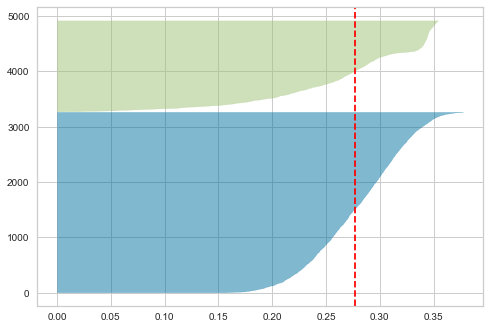

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')
visualizer.fit(datos_reducidos)
plt.plot()

Se puede apreciar un desbalanceo en el tamaño de los grupos.

### 11.1.2) Índice Davies-Bouldin

In [ ]:
from sklearn.metrics import davies_bouldin_score
db = davies_bouldin_score(datos_reducidos, etiquetas)
print("Índice de Davies Bouldin: "+str(db))

Índice de Davies Bouldin: 1.592848583993158


Se obtiene un valor de 1.59. Dicho valor no es cercano a cero, por tanto la agrupación no es la mejor; adicionalmente, este valor no es muy grande, así que la agrupación no es del todo mala. Se concluye que es indiferente la agrupación realizada con k-means.

### 11.1.3) Precision

Se elabora una función que calcula los valores de precision y recall.

In [ ]:
def precision_recall(clase_supervision,clase_generada):
    VP = 0
    FP = 0
    FN = 0
    VN = 0
    total = len(clase_supervision)
    for i in range(0,total):
        if clase_generada[i] == 1:
            if clase_supervision[i] == 1:
                VP = VP+1
                #print("VP:    clase_supervision: "+str(clase_supervision[i])+" clase_generada: "+str(clase_generada[i])+"  total VP: "+str(VP))
            elif clase_supervision[i] == 0:
                FP = FP+1
                #print("FP:    clase_supervision: "+str(clase_supervision[i])+" clase_generada: "+str(clase_generada[i])+"  total FP: "+str(FP))
        elif clase_generada[i] == 0:
            if clase_supervision[i] == 1:
                FN=FN+1
                #print("FN:    clase_supervision: "+str(clase_supervision[i])+" clase_generada: "+str(clase_generada[i])+"  total FN: "+str(FN))
            elif clase_supervision[i] == 0:
                VN = VN+1
                #print("VN:    clase_supervision: "+str(clase_supervision[i])+" clase_generada: "+str(clase_generada[i])+"  total VN: "+str(VN))
    precision = VP/(VP+FP)
    recall = VP/(VP+FN)
    return precision,recall, VP, FP, FN, VN

In [ ]:
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))

Verdaderos positivos: 29
Falsos positivos: 1613
Falsos negativos: 216
Verdaderos negativos: 3041


In [ ]:
print("Precisión  "+str(precision))

Precisión  0.01766138855054811


Se obtiene un valor regular de precision, lo cual indica que hay un número no despreciable de falsos positivos resultantes de la agrupación k-means.

### 11.1.4) Recall

In [ ]:
print("Recall: "+str(recall))

Recall: 0.11836734693877551


Se obtiene un valor alto de recall, lo cual indica que la cantidad de falsos negativos es baja comparada con la cantidad de verdaderos positivos.

### 11.1.5) Medida F1

In [ ]:
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 calculada a partir de los valores de precision y recall:  "+str(F1))

Valor de medida F1 calculada a partir de los valores de precision y recall:  0.03073661897191309


Se obtiene un resultado bueno, pero es posible mejorar.

## 11.2) DBSCAN

Ahora se usará un algoritmo basado en densidad. Con dicho algoritmo se tiene la ventaja de que cualquier ruido que haya quedado en el conjunto de datos es eliminado.

Sin embargo, es necesario fijar los parámetros de la distancia $\epsilon$ y el número mínimo de puntos minPoints que deben existir dentro de un círculo de radio $\epsilon$ para que un punto sea considerado como "core point". Así que primeramente se ejecuta el algoritmo k-nearest neighbor con el cual, realizando algunos cálculos, podemos saber cuál es el valor de $\epsilon$ óptimo.

Después de muchas pruebas, se concluyó que el desempeño de DBSCAN es mejor cuando este usa las 10 columnas originales del conjunto de datos, comparado con el desempeño del algoritmo usando los datos reducidos a 7 columnas por PCA.

Así que se trabaja con los datos sin PCA.

In [ ]:
datos_norm = datos_normalizados.copy()
datos_norm.shape

(4899, 10)

A manera de ayuda para determinar el parámetro $\epsilon$, se ejecuta un fragmento de código con el cual se puede obtener una gráfica que estima el $\epsilon$ óptimo.

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(datos_norm)
neigh_dist, neigh_ind = nbrs.kneighbors(datos_norm)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

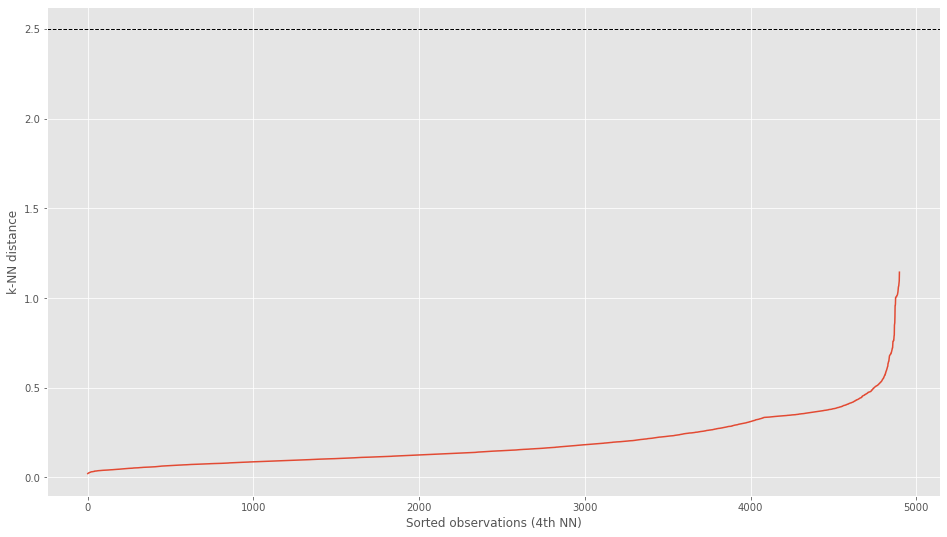

In [ ]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

Se observa que el punto de inflexión de la gráfica, momento justo antes de que la gráfica trace el fuerte movimiento vertical, ese es el mejor punto para el valor de $\epsilon$.

Aproximadamente, $\epsilon = 0.4$

Luego de ello, se procede a inicializar el algoritmo DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
cluster_DBSCAN = DBSCAN(eps=0.4, min_samples=4, metric = 'euclidean').fit(datos_norm)
etiquetas = cluster_DBSCAN.labels_
from collections import Counter
Counter(etiquetas)

Counter({0: 59,
         1: 48,
         2: 844,
         3: 100,
         4: 520,
         5: 9,
         6: 438,
         -1: 150,
         7: 21,
         8: 68,
         10: 786,
         11: 105,
         9: 491,
         12: 328,
         13: 336,
         14: 85,
         15: 35,
         21: 7,
         16: 440,
         23: 3,
         18: 9,
         19: 4,
         20: 5,
         17: 4,
         22: 4})

Se crea una gran cantidad de clusters que, podrían representar clasificaciones de los pacientes no vienen al caso de la predicción de existencia de ACV. Con pruebas de ensayo y error se logra obtener 2 clusters para valores $\epsilon = 1.0055$ y min_samples = 100.

In [ ]:
cluster_DBSCAN = DBSCAN(eps=1.0055, min_samples=100, metric = 'euclidean').fit(datos_norm)
etiquetas = cluster_DBSCAN.labels_
from collections import Counter
Counter(etiquetas)

Counter({0: 4635, -1: 264})

In [ ]:
T = len(etiquetas)
for i in range (0,T):
    if etiquetas[i] == -1:
        etiquetas[i] = 1
Counter(etiquetas)

Counter({0: 4635, 1: 264})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_DBSCAN = pd.DataFrame(clase, columns=['ACV'])
resultados_DBSCAN = resultados_DBSCAN.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_DBSCAN

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,1
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
4894,0.0,0
4895,0.0,0
4896,0.0,0
4897,0.0,0


Ahora se procede a realizar el proceso de validación. Primeramente se realiza el cálculo de medidas de validación internas.

### 11.2.1) Coeficiente de Silhouette

In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))

Coeficiente de Silhouette: 0.19188666153424477


Se obtiene un coeficiente de Silhouette de 0.19. Dicho valor es cercano a 0, lo cual indica que los resultados del proceso de clustering son indiferentes, es decir ni buenos ni malos.

#### 11.2.2) Índice Davies-Bouldin

In [ ]:
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))

Índice de Davies Bouldin: 2.3967597156492295


Se obtiene un valor de 2.39. Dicho valor no es cercano a cero, por tanto la agrupación no es la mejor; adicionalmente, este valor no es muy grande, así que la agrupación no es del todo mala. Se concluye que es indiferente la agrupación realizada con DBSCAN.

### 11.2.3) ´Precision

Ahora se realizarán los cálculos para medidas de validación externas como lo son precision, recall, F1. Así que se hará uso de una función que realiza estos cálculos.

In [ ]:
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))

Verdaderos positivos: 48
Falsos positivos: 216
Falsos negativos: 197
Verdaderos negativos: 4438


In [ ]:
print("Precisión  "+str(precision))

Precisión  0.18181818181818182


Se obtiene un valor de precision del 18.2%, el cual indica gran cantidad de falsos positivos.

### 11.2.4) Recall

In [ ]:
print("Recall: "+str(recall))

Recall: 0.19591836734693877


Se tiene un valor de 19.6%, el cual es un valor bajo del cual se infiere que hay gran presencia de falsos negativos.

### 11.2.5) Medida F1

In [ ]:
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 calculada a partir de los valores de precision y recall:  "+str(F1))

Valor de medida F1 calculada a partir de los valores de precision y recall:  0.1886051080550098


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1: "+str(F1))

Coeficiente de Silhouette: 0.19188666153424477
Índice de Davies Bouldin: 2.3967597156492295
Verdaderos positivos: 48
Falsos positivos: 216
Falsos negativos: 197
Verdaderos negativos: 4438
Precisión  0.18181818181818182
Recall: 0.19591836734693877
Valor de medida F1: 0.1886051080550098


### Conclusión:

El algoritmo tiene un desempeño malo según las medidas de validación externas; los valores de precision, recall y medida F1 son muy bajos. En adición, según medidas de validación internas, el algoritmo tiene un desempeño regular arrojando resultados de los cuales se deduce que el algoritmo es indiferente.

Esto permite concluir que el algoritmo no predice bien la presencia de accidente cerero-vascular dada la información del conjunto de datos, y la calidad de los clusters es regular obteniendo valores de cohesión y separación no tan buenos.

No es posible graficar los clusters pero se puede inferir que los puntos pertenecientes a un cluster no son cercanos entre sí, y los dos clusters no se encuentran lo suficientemente separados.

## 11.3) OPTICS

Se ejecutará el algoritmo de clustering OPTICS el cual se basa en densidad y resulta ser una versión mejorada de DBSCAN ya que no se requiere realizar un ajuste fino a los parámetros. Basta con establecer un $\epsilon$ grande (es una buena práctica que este valor sea grande) y el mínimo número de puntos para los cuales es válida un área local.

En este caso, max_eps = 1000 y min_samples = 800.

Después de muchas pruebas, se concluyó que el desempeño de DBSCAN es mejor cuando este usa las 10 columnas originales del conjunto de datos, comparado con el desempeño del algoritmo usando los datos reducidos a 7 columnas por PCA.

Así que se trabaja con los datos sin PCA.

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
cluster_OPTICS = OPTICS(max_eps = 1000, min_samples=800, metric = 'euclidean')
cluster_OPTICS.fit(datos_norm)
space = np.arange(len(datos_norm))
reachability = cluster_OPTICS.reachability_[cluster_OPTICS.ordering_]
etiquetas = cluster_OPTICS.labels_[cluster_OPTICS.ordering_]

In [ ]:
Counter(etiquetas)

Counter({-1: 4054, 0: 845})

In [ ]:
T = len(etiquetas)
for i in range (0,T):
    if etiquetas[i] == -1:
        etiquetas[i] = 0
    elif etiquetas[i] == 0:
        etiquetas[i] = 1
Counter(etiquetas)

Counter({0: 4054, 1: 845})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_OPTICS = pd.DataFrame(clase, columns=['ACV'])
resultados_OPTICS = resultados_OPTICS.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_OPTICS

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
4894,0.0,0
4895,0.0,0
4896,0.0,0
4897,0.0,0


Text(0.5, 1.0, 'Reachability Plot')

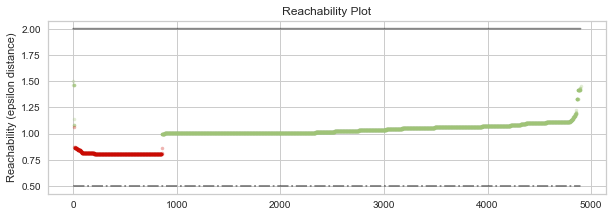

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
#ax2 = plt.subplot(G[1, 0])
#ax3 = plt.subplot(G[1, 1])
#ax4 = plt.subplot(G[1, 2])

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[etiquetas == klass]
    Rk = reachability[etiquetas == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

Ahora se procede a realizar el proceso de validación. Primeramente se realiza el cálculo de medidas de validación internas.

### 11.3.1) Coeficiente de Silhouette

In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))

Coeficiente de Silhouette: 0.003241785791661026


Se obtiene un valor cercano a cero en el coeficiente de Silhouette, lo cual indica que la agrupación es indiferente, no es buena ni mala.

### 11.3.2) índice Davies-Bouldin

In [ ]:
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))

Índice de Davies Bouldin: 17.277608717033253


Se obtiene un índice Davies-Bouldin alto, lo cual indica que el proceso de agrupación es regular y se puede mejorar.

### 11.3.3) Precision

Ahora se realizarán los cálculos para medidas de validación externas como lo son precision, recall, F1. Así que se hará uso de una función que realiza estos cálculos.

In [ ]:
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))

Verdaderos positivos: 194
Falsos positivos: 651
Falsos negativos: 51
Verdaderos negativos: 4003


In [ ]:
print("Precisión  "+str(precision))

Precisión  0.22958579881656804


Se obtiene una precisión del 22.9%, el cual indica un mal desempeño del algorimto, con mucha presencia de falsos positivos.

### 11.3.4) Recall

In [ ]:
print("Recall: "+str(recall))

Recall: 0.7918367346938775


Se obtiene un valor de recall del 79%, el cual es bueno. Se puede concluir que hay pocos falsos negativos.

### 11.3.5) Medida F1

In [ ]:
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 calculada a partir de los valores de precision y recall:  "+str(F1))

Valor de medida F1 calculada a partir de los valores de precision y recall:  0.35596330275229354


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1: "+str(F1))

Coeficiente de Silhouette: 0.003241785791661026
Índice de Davies Bouldin: 17.277608717033253
Verdaderos positivos: 194
Falsos positivos: 651
Falsos negativos: 51
Verdaderos negativos: 4003
Precisión  0.22958579881656804
Recall: 0.7918367346938775
Valor de medida F1: 0.35596330275229354


### Conclusión:

El algoritmo tiene un desempeño malo según las medidas de validación externas; los valores de precision, recall y medida F1 son muy bajos. En adición, según medidas de validación internas, el algoritmo tiene un desempeño regular arrojando resultados de los cuales se deduce que el algoritmo es indiferente.

Esto permite concluir que el algoritmo no predice bien la presencia de accidente cerero-vascular dada la información del conjunto de datos, y la calidad de los clusters es regular obteniendo valores de cohesión y separación no tan buenos.

No es posible graficar los clusters pero se puede inferir que los puntos pertenecientes a un cluster no son cercanos entre sí, y los dos clusters no se encuentran lo suficientemente separados.

Finalmente, las medidas de validación internas son peores que en DBSCAN, pero en cuanto a validación externa es mejor OPTICS



# 1.4) Expectation-maximization, algoritmo de mezcla gaussiana

Ahora se utilizará un algoritmo basado en modelos de probabilidad, ya que con los algoritmos de partición y densidad no se obtuvieron los resultados esperados.

Además, como parámetro del modelo se puede fijar el número de clusters; en esta aplicación es útil ya que la agrupación debe hacerse para Si_ACV y No_ACV.

In [ ]:
from sklearn.mixture import GaussianMixture
from numpy import unique
gaussian_model = GaussianMixture(n_components=2)
gaussian_model.fit(datos_reducidos)
etiquetas = gaussian_model.predict(datos_reducidos)
Counter(etiquetas)

Counter({1: 703, 0: 4196})

In [ ]:
T = len(etiquetas)
for i in range (0,T):
    if etiquetas[i] == 1:
        etiquetas[i] = 0
    elif etiquetas[i] == 0:
        etiquetas[i] = 1
Counter(etiquetas)

Counter({0: 703, 1: 4196})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_EM = pd.DataFrame(clase, columns=['ACV'])
resultados_EM = resultados_EM.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_EM

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,1
3,1.0,0
4,1.0,1
...,...,...
4894,0.0,1
4895,0.0,1
4896,0.0,0
4897,0.0,1


Ahora se procede a realizar el proceso de validación. Primeramente se realiza el cálculo de medidas de validación internas.

### 11.4.1) Coeficiente de Silhouette

In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_reducidos, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))

Coeficiente de Silhouette: 0.19061871023263327


Se obtiene un coeficiente de Silhouette pequeño y cercano a 0, lo cual indica que los resultados del proceso de clustering son indiferentes, es decir ni buenos ni malos.

### 11.4.2) índice Davies-Bouldin

In [ ]:
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))

Índice de Davies Bouldin: 1.6729198689071734


El valor obtenido no es cercano a cero, por tanto la agrupación no es la mejor; adicionalmente, este valor no es muy grande, así que la agrupación no es del todo mala.

### 11.4.3) Precision

In [ ]:
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))

Verdaderos positivos: 146
Falsos positivos: 4050
Falsos negativos: 99
Verdaderos negativos: 604


In [ ]:
print("Precisión  "+str(precision))

Precisión  0.03479504289799809


Se obtiene un valor de precision demasiado bajo, con gran presencia de falsos positivos. Esto puede ser debido a que la cantidad de registros que son positivos en el conjunto de datos es 20 veces menor que aquellos negativos; este desbalanceo hace probable que el algoritmo tome datos con clase negativa y los agrupe en la clase positiva.

### 1.4.4) Recall

In [ ]:
print("Recall: "+str(recall))

Recall: 0.5959183673469388


Se obtiene un valor medio para esta medida, lo cual indica una igual presencia de falsos negativos comparada con la cantidad de verdaderos positivos.

### 1.4.5) Medida F1

In [ ]:
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 calculada a partir de los valores de precision y recall:  "+str(F1))

Valor de medida F1 calculada a partir de los valores de precision y recall:  0.06575095699166854


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1: "+str(F1))

Coeficiente de Silhouette: 0.1853940099849396
Índice de Davies Bouldin: 2.399255863862991
Verdaderos positivos: 146
Falsos positivos: 4050
Falsos negativos: 99
Verdaderos negativos: 604
Precisión  0.03479504289799809
Recall: 0.5959183673469388
Valor de medida F1: 0.06575095699166854


### 1.4.6) Conclusión

El algoritmo no logró mejorar sustancialmente las medidas de validación internas, lo cual indica que la calidad de los clusters no es la mejor.

En cuanto a medidas de validación externas se obtuvo un mal resultado en cuanto a precisión, sin embargo el recall no es malo, lo que significa que el algoritmo logró agrupar medianamente bien los casos en que no se tiene ACV.

# 1.5) Agrupamiento espectral

Ahora se utiliza un algoritmo basado en el uso de grafos. Esto con el fin de mejorar los resultados obtenidos con otro tipo de algoritmos.

In [ ]:
from sklearn.cluster import SpectralClustering
spectral_cluster_model= SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None, n_clusters=2, n_components=None, n_init=10, n_jobs=None, n_neighbors=10, random_state=None)
etiquetas = spectral_cluster_model.fit_predict(datos_reducidos)
Counter(etiquetas)

Counter({0: 3366, 1: 1533})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_SC = pd.DataFrame(clase, columns=['ACV'])
resultados_SC = resultados_SC.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_SC

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
4894,0.0,1
4895,0.0,0
4896,0.0,0
4897,0.0,0


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_reducidos, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))

Coeficiente de Silhouette: 0.2705895110765802


In [ ]:
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))

Índice de Davies Bouldin: 1.6599935445575722


In [ ]:
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))

Verdaderos positivos: 13
Falsos positivos: 1520
Falsos negativos: 232
Verdaderos negativos: 3134


In [ ]:
print("Precisión  "+str(precision))

Precisión  0.008480104370515329


In [ ]:
print("Recall: "+str(recall))

Recall: 0.053061224489795916


In [ ]:
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 calculada a partir de los valores de precision y recall:  "+str(F1))

Valor de medida F1 calculada a partir de los valores de precision y recall:  0.014623172103487063


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_norm, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1: "+str(F1))

Coeficiente de Silhouette: 0.2456019677038713
Índice de Davies Bouldin: 1.6599935445575722
Verdaderos positivos: 13
Falsos positivos: 1520
Falsos negativos: 232
Verdaderos negativos: 3134
Precisión  0.008480104370515329
Recall: 0.053061224489795916
Valor de medida F1: 0.014623172103487063


# 1.6) Algoritmo Birch

Ahora se utilizará un algoritmo de agrupación jerárquica, distinto a los algoritmos anteriormente utilizados. Esto para probar si este algoritmo puede realizar una buena agrupación.

In [ ]:
from sklearn.cluster import Birch
birch_model = Birch(threshold=1., n_clusters=2)
birch_model.fit(datos_reducidos)
etiquetas = birch_model.predict(datos_reducidos)
Counter(etiquetas)

Counter({0: 4434, 1: 465})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_SC = pd.DataFrame(clase, columns=['ACV'])
resultados_SC = resultados_SC.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_SC

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,1
4,1.0,0
...,...,...
4894,0.0,0
4895,0.0,0
4896,0.0,1
4897,0.0,0


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_reducidos, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1 :"+str(F1))

Coeficiente de Silhouette: 0.2013557154355823
Índice de Davies Bouldin: 1.857698601263341
Verdaderos positivos: 62
Falsos positivos: 403
Falsos negativos: 183
Verdaderos negativos: 4251
Precisión  0.13333333333333333
Recall: 0.2530612244897959
Valor de medida F1 :0.17464788732394365


### 1.6.1) Conclusión

No se obtuvieron mejores resultados que los algoritmos de partición, densidad ni basados en modelos de probabilidad.

# 1.7) Algoritmo de agrupación aglomerativa

Finalmente se hace uso de este algoritmo basado en jerarquías. Se puede fijar el número de clusters y tiene pocos parámetros, lo que facilita su uso.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_model = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean')

# asignar cada punto de datos a un grupo
etiquetas = agglomerative_model.fit_predict(datos_reducidos)
Counter(etiquetas)

Counter({0: 3327, 1: 1572})

In [ ]:
clase = datos_numericos['stroke'].tolist()
resultados_SC = pd.DataFrame(clase, columns=['ACV'])
resultados_SC = resultados_SC.assign(Prediccion_ACV = lambda x: etiquetas)
resultados_SC

,ACV,Prediccion_ACV
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
4894,0.0,1
4895,0.0,0
4896,0.0,0
4897,0.0,0


In [ ]:
coeficiente_silhouette = metrics.silhouette_score(datos_reducidos, etiquetas, metric='euclidean')
print("Coeficiente de Silhouette: "+ str(coeficiente_silhouette))
db = davies_bouldin_score(datos_norm, etiquetas)
print("Índice de Davies Bouldin: "+str(db))
precision,recall, VP, FP, FN, VN = precision_recall(clase,etiquetas)
print("Verdaderos positivos: "+str(VP))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print("Verdaderos negativos: "+str(VN))
print("Precisión  "+str(precision))
print("Recall: "+str(recall))
F1 = 2/(1/precision+1/recall)
print("Valor de medida F1: "+str(F1))

Coeficiente de Silhouette: 0.27220792938381894
Índice de Davies Bouldin: 1.6624148339042972
Verdaderos positivos: 15
Falsos positivos: 1557
Falsos negativos: 230
Verdaderos negativos: 3097
Precisión  0.009541984732824428
Recall: 0.061224489795918366
Valor de medida F1: 0.01651073197578426


### 1.7.1) Conclusión

No se obtuvieron mejores resultados que los algoritmos de partición, densidad, basados en modelos de probabilidad ni los jerárquicos usados con anterioridad.

# 12) Aplicación de algoritmos de clasificación

## Preprocesamiento preliminar

### Desbalanceo de clase:
El conjunto de datos se encuentra desbalanceado con respecto a la clase "stroke".

In [22]:
Y = clase.values
T = Y.shape[0]
N_Si_ACV = np.count_nonzero(Y)
N_No_ACV = T-N_Si_ACV
porc_Si_ACV = N_Si_ACV/T*100
porc_No_ACV = N_No_ACV/T*100
print("Porcentaje de registros que contienen la clase Si_ACV: "+str(porc_Si_ACV)+" %")
print("Porcentaje de registros que contienen la clase No_ACV: "+str(porc_No_ACV)+" %")

Porcentaje de registros que contienen la clase Si_ACV: 5.001020616452338 %
Porcentaje de registros que contienen la clase No_ACV: 94.99897938354766 %


Claramente el conjunto de datos se encuentra desbalanceado, así que se decidió por usar algoritmos de clasificación sobre los cuales se pudiese modificar los pesos de importancia de cada clase.

### Nueva normalización de datos:
Se toman los datos antes de ser normalizados por MinMax entre 0 y 1, para ahora hacer una normalización Z basada en una distribución normal.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datos_sin_clase)                                     
datos_normalizados = scaler.transform(datos_sin_clase) 
datos_normalizados

array([[ 1.18982372,  1.03145463, -0.32805375, ...,  2.71319353,
         1.18612018, -0.36701609],
       [ 1.18982372,  1.61134472, -0.32805375, ..., -0.00350164,
         0.57873881,  0.56847393],
       [-0.84046064,  0.22852989, -0.32805375, ...,  1.44169964,
         0.86020823,  1.50396395],
       ...,
       [-0.84046064,  0.05010217,  3.04828096, ..., -0.24470045,
         0.47503955,  1.50396395],
       [ 1.18982372, -0.17293248, -0.32805375, ..., -0.48988235,
         0.20838432,  1.50396395],
       [-0.84046064,  1.61134472,  3.04828096, ..., -0.49408674,
         0.0750567 ,  0.56847393]])

Dados resultados preliminares usando algoritmos de clasificación, no se vio una diferencia significativa entre usar los datos con dimensionalidad reducida y aquellos con la totalidad de sus atributos, por tanto se decidió por usar el conjunto de datos sin reducción de dimensionalidad para conservar la naturaleza de cada uno de los atributos originales en los procesos de entrenamiento.

In [24]:
from sklearn.model_selection import train_test_split
X=datos_normalizados.copy()
X.shape

(4899, 10)

También se cuenta con la clase, por medio de la cual y en conjunto con los datos de entrada, se entrenarán los modelos de clasificación.

In [25]:
Y = clase.values
Y

array([1., 1., 1., ..., 0., 0., 0.])

### Partición de datos en entrenamiento y validación

Se realiza la partición del conjunto de datos usando un muestreo estratificado ya que el conjunto de datos está desbalanceado,  destinando el 80% para entrenamiento y 20% para validación.

In [26]:
from collections import Counter
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = clase, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
Counter(Y_train)

(3429, 10)
(3429,)
(1470, 10)
(1470,)


Counter({0.0: 3258, 1.0: 171})

In [27]:
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
X_train

array([[-0.84046064,  0.58538533,  3.04828096, ...,  2.78024237,
         2.53421055, -0.36701609],
       [-0.84046064,  1.29909621, -0.32805375, ..., -0.16348947,
        -0.147156  , -1.3025061 ],
       [-0.84046064, -0.03911169, -0.32805375, ..., -0.22456367,
        -1.00637843, -1.3025061 ],
       ...,
       [ 1.18982372,  0.18392296, -0.32805375, ..., -0.94594725,
        -0.31011198,  1.50396395],
       [-0.84046064,  1.25448928, -0.32805375, ...,  2.67314125,
         1.20093436, -0.36701609],
       [-0.84046064, -1.51114038, -0.32805375, ...,  0.13856224,
        -1.55450308, -1.3025061 ]])

Se declara la siguiente función para el cálculo de las medidas de validación que van a servir para poner a prueba los modelos finales.

Algoritmo de validación:

In [29]:
def validacion(Y_test, Y_predicted, valor):
    VP = 0
    VN = 0
    FP = 0
    FN = 0
    N = Y_test.shape[0]
    for i in range(0,N):
        if Y_test[i] == valor:
            if Y_test[i] == Y_predicted[i]:
                VP = VP+1
            else:
                FN = FN+1
        else:
            if Y_predicted[i] != valor:
                VN = VN+1
            else:
                FP = FP+1
    accuracy = (VP+VN)/(VP+FP+FN+VN)
    error = 1-accuracy
    precision = VP/(VP+FP)
    recall = VP/(VP+FN)
    f1 = 2*precision*recall/(precision+recall)
    #matriz = [[VP, FN],[FP, VN]]
    matriz = np.zeros((2,2))
    matriz[0,0] = VP
    matriz[0,1] = FN
    matriz[1,0] = FP
    matriz[1,1] = VN
    return matriz, accuracy, error, precision, recall, f1

### Balanceo de clases realizando over sampling

Otra alternativa contemplada para solucionar el problema de clasificación sobre el conjunto de datos desbalanceado es el uso de técnicas de oversampling con las cuales se completa el número de clases minoristas con la creación de un conjunto de datos sintético.

Dichos datos sintéticos se proyectan a partir de la información que se tiene de la clase minorista, en este caso para los valores en que hay presencia de Accidente Cerebro Vascular.

### Uso de función SMOTE

Se hace uso de la función SMOTE (Synthetic Minority Oversampling technique) con la cual se balancean las clases a partir de la creación de nuevos datos. Este algoritmo de oversampling usa los vecinos más cercanos para definir un vecindario de muestras sobre aquellos datos de la clase minorista.

Los datos que se destinan a prueba permitirán poner a prueba el modelo de clasificación, ya que cabe la posibilidad de que el modelo se sobreajuste a los datos sintéticos y no haga una buena predicción sobre los reales

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = clase, test_size = 0.2, random_state = 10)

In [33]:
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 20, random_state=42, n_jobs = -1)
X_sm, Y_sm = sm.fit_resample(X_train, Y_train)
print(X_sm.shape)
Counter(Y_sm)

(7446, 10)


Counter({0.0: 3723, 1.0: 3723})

Del resultado anterior se puede ver que los valores para la clase ya se encuentran balanceados.

Para tener una visual sobre los datos con oversampling, se aplica la técnica de PCA para proyectar los datos en dos dimensiones y poderlos graficar en el plano 2d.

Conjunto de entrenamiento original:

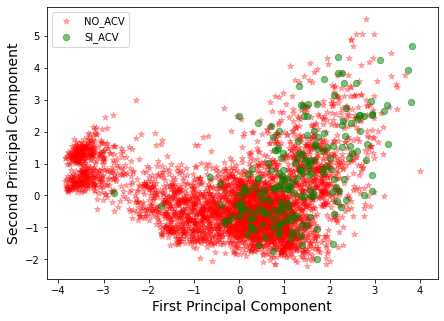

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(X_train)
datos_2_dimensiones1 = pca1.transform(X_train)
Xax=datos_2_dimensiones1[:,0]
Yax=datos_2_dimensiones1[:,1]
labels=Y_train
cdict={0:'red' ,1:'green'}
labl={0:'NO_ACV',1:'SI_ACV'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Conjunto de entrenamiento balanceado:

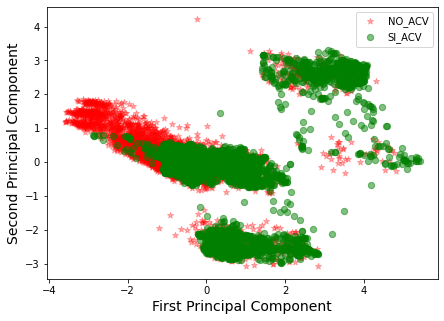

In [35]:
pca2 = PCA(n_components=2)
pca2.fit(X_sm)
datos_2_dimensiones = pca2.transform(X_sm)
Xax=datos_2_dimensiones[:,0]
Yax=datos_2_dimensiones[:,1]
labels=Y_sm
cdict={0:'red' ,1:'green'}
labl={0:'NO_ACV',1:'SI_ACV'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

En dos dimensiones existe una superposición de datos, al igual a como ocurre con los datos de entrenamiento originales. Esto podría hacer que los algoritmos de clasificación no tengan un gran desempeño; esta posibilidad no se presentaría a causa de una mal sintonización de los hiperparámetros de los modelos de predicción, sino que es causada por la misma naturaleza de los datos

## 12.1) Uso de un modelo de árbol de decisión:

Se implementa un árbol de decisión para el problema de clasificación. Dada la cantidad de hiperparámetros que hay que sintonizar, se hizo uso de la función de GridSearchCv, la cual permitió realizar un barrido sobre todos los modelos posibles según un rango de valores para cada uno de los hiperparámetros.

Se realizan varias iteraciones manuales para encontrar un rango de barrido óptimo para cada uno de los hiperparámetros que son de importancia en un árbol de decisión.

In [329]:
from sklearn.model_selection import GridSearchCV
import pprint
# Create the parameter grid based on the results of random search 
grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'class_weight' : [{0:1, 1: 1}],
    'random_state' : [1]}

print(grid)

{'criterion': ['entropy', 'gini'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'class_weight': [{0: 1, 1: 1}], 'random_state': [1]}


Se indica en el proceso de barrido de modelos que la validación se realice siguiendo un modelo de validación cruzada con un número de pliegues igual a 10. La medida a maximizar en el recorrido es la precisión ya que es el valor más crítico  y que suele tener el valor más bajo con respecto a las demás medidas de validación.

Se utilizan como datos de entrenamiento el conjunto balanceado con oversampling, así que los pesos de cada clase se instancian 0:1 y 1:1 ya que no es necesario ponderar una clase sobre la otra.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
dtree = DecisionTreeClassifier()
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(scoring = ["precision"], refit = "precision", estimator = dtree, param_grid = grid, cv = CV, n_jobs = -1, verbose = 2)
grid_search.fit(X_sm, Y_sm)

Fitting 5 folds for each of 2280 candidates, totalling 11400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                       40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [1]},
             refit='precision', scoring=['precision'], verbose=2)

Se obtienen los siguientes valores de los hiperparámetros óptimos:

In [45]:
grid_search.best_params_

{'class_weight': {0: 1, 1: 1},
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 1}

Teniendo estos, se construye un modelo definitivo de árbol de decisión.

Función para medir la calidad de splits: gini

Máxima profundidad del árbol: 5, no se escoge tan profundo el árbol para evitar hacer overfitting

Pesos en clases: balanceado

Número de características a considerar buscando mejor división: se escoger el mejor dependiendo de dato

Mínimo número de muestras para estar en una hoja:2

Mínimo número de muestras para realizar una división: 5

In [226]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
arbol = DecisionTreeClassifier(criterion = "gini",
                               class_weight = {0: 1, 1: 1},
                               max_depth = 5,
                               max_features = "auto",
                               min_samples_leaf = 2,
                               min_samples_split = 5,
                               random_state = 1)

### Validación cruzada:

Como prueba preliminar, se realiza un modelo de validación cruzada con 10 splits. De allí se obtienen los valores de accuracy, precision, recall y medida f1.

In [227]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
accuracy = cross_val_score(arbol, X_sm, Y_sm, cv=CV, scoring = "accuracy")
accuracy

array([0.78926174, 0.80805369, 0.77986577, 0.8147651 , 0.8147651 ,
       0.83892617, 0.79301075, 0.79569892, 0.80645161, 0.8172043 ])

El accuracy puede ser engañoso, ya que un modelo se puede entrenar muy bien considerando una de las clases pero descuidando la otra en un conjunto de datos desbalanceado, y aún así obtenerse valores altos de accuracy. Las siguientes medidas son más determinantes en el rendimiento del algoritmo. 

In [228]:
precision = cross_val_score(arbol, X_sm, Y_sm, cv=CV, scoring = "precision")
precision

array([0.75656325, 0.73903967, 0.75242718, 0.78313253, 0.76765376,
       0.79350348, 0.74660633, 0.76190476, 0.75333333, 0.78095238])

In [229]:
recall = cross_val_score(arbol, X_sm, Y_sm, cv=CV, scoring = "recall")
recall

array([0.85215054, 0.9516129 , 0.83333333, 0.87131367, 0.90348525,
       0.91689008, 0.88709677, 0.86021505, 0.91129032, 0.88172043])

In [230]:
f1 = cross_val_score(arbol, X_sm, Y_sm, cv=CV, scoring = "f1")
f1

array([0.80151707, 0.8319624 , 0.79081633, 0.8248731 , 0.83004926,
       0.85074627, 0.81081081, 0.80808081, 0.82481752, 0.82828283])

In [231]:
from statistics import mean
precision_final =mean(precision)
print("precision final: "+str(precision_final))
recall_final =mean(recall)
print("Recall final: "+str(recall_final))
f1_final =mean(np.array(f1))
print("Medida F1: "+str(f1_final))

precision final: 0.7635116676233331
Recall final: 0.8869108362881605
Medida F1: 0.8201956382323977


### Testing

Se obtienen valores de precisión, recall y medida f1 buenos en validación cruzada. Sin embargo, hace falta poner a prueba el modelo utilizando el conjunto de datos destinado para validación final, con ello se sabe si el modelo entrenado con un conjunto de datos balanceado por oversampling sí predice bien en definitiva.

Para ello, se entrena el modelo con el conjunto de de entrenamiento y se predicen las clases usando el conjunto de datos de test final.
Luego los resultados se comparan y se calculan las medidas de validación usando las clases reales destinadas a test final.

In [307]:
arbol = arbol.fit(X_sm, Y_sm)
Y_predicted = arbol.predict(X_test)

Matriz de confusión:

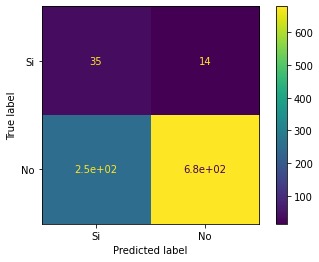

In [308]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix, accuracy, error, precision, recall, f1 = validacion(Y_test,Y_predicted,1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Si', 'No'])
cm_display.plot()
plt.show()

In [309]:
print("Accuracy: "+str(accuracy))
print("Error: "+str(error))
print("Precisión: "+str(precision))
print("Recall: "+str(recall))
print("Medida F1: "+str(f1))

Accuracy: 0.7295918367346939
Error: 0.27040816326530615
Precisión: 0.12237762237762238
Recall: 0.7142857142857143
Medida F1: 0.20895522388059704


### Curva ROC:

In [310]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
auc = metrics.roc_auc_score(Y_test, Y_predicted)
print("Área bajo la curva ROC:  "+str(auc))

Área bajo la curva ROC:  0.7223415682062299


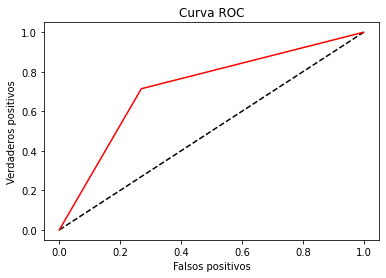

In [311]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted, drop_intermediate=False)
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.title('Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,'r')


A continuación se grafica el árbol.

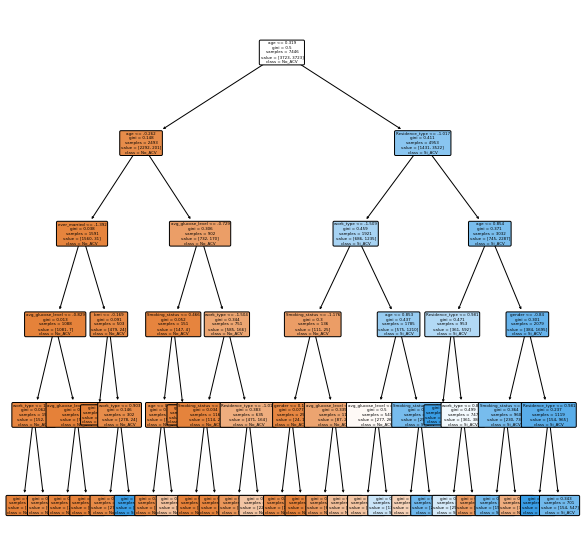

In [312]:
features = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "Smoking_status"]
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(arbol, feature_names = features, class_names = ["No_ACV", "Si_ACV"], filled=True, rounded = True, fontsize = 4)
fig.savefig('arbol_decision.png')

## 12.2) Modelo de Random Forest

A manera de contrastar los resultados del árbol de decisión con uno similar, se utiliza el modelo Random Forest.

Dada la cantidad de hiperparámetros que hay que sintonizar, se hizo uso de la función de GridSearchCv, la cual permitió realizar un barrido sobre todos los modelos posibles según un rango de valores para cada uno de los hiperparámetros.

Uno de los hiperparámetros más importantes en este modelo es el número de árboles, así que el barrido ce centra en dicho parámetro.

Los hiperparámetros min_samples_leaf y min_samples_split se fijan a un solo valor, el cual fue obtenido de anteriores iteraciones.

El hiperparámetro bootstrap se fija en true para que en la construcción de cada árbol se utilice una muestra de los datos de entrada, agilizando el proceso de entrenamiento.

In [250]:
from sklearn.model_selection import GridSearchCV
import pprint
# Create the parameter grid based on the results of random search 
grid = {
    'n_estimators' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' : ['entropy', 'gini'],
    'max_depth': [5],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [3],
    'class_weight' : [{0:1, 1: 1}],
    'bootstrap' : [True],
    'random_state' : [1]}

print(grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['entropy', 'gini'], 'max_depth': [5], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [3], 'class_weight': [{0: 1, 1: 1}], 'bootstrap': [True], 'random_state': [1]}


Se indica en el proceso de barrido de modelos que la validación se realice siguiendo un modelo de validación cruzada con un número de pliegues igual a 2. La medida a maximizar en el recorrido es la precisión ya que es el valor más crítico y que suele tener el valor más bajo con respecto a las demás medidas de validación.

Se utilizan como datos de entrenamiento el conjunto balanceado con oversampling, así que los pesos de cada clase se instancian 0:1 y 1:1 ya que no es necesario ponderar una clase sobre la otra.

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
random_forest = RandomForestClassifier()
CV = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
grid_search = GridSearchCV(scoring = ["precision"], refit = "precision", estimator = random_forest, param_grid = grid, cv = CV, n_jobs = -1, verbose = 2)
grid_search.fit(X_sm, Y_sm)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=2, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': [{0: 1, 1: 1}],
                         'criterion': ['entropy', 'gini'], 'max_depth': [5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [3],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [1]},
             refit='precision', scoring=['precision'], verbose=2)

Se obtienen los siguientes valores de los hiperparámetros óptimos:

In [252]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': {0: 1, 1: 1},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 3,
 'random_state': 1}

Teniendo estos, se construye un modelo definitivo Random Forest

Número de árboles en el bosque: 3 (se mantiene bajo para evitar hacer overfitting)

Función para medir la calidad de las divisiones: entropía

Máxima profundidad del árbol: 5

Pesos en clases: balanceado

Número de características a considerar buscando mejor división: se escoger el mejor dependiendo de dato

Mínimo número de muestras para estar en una hoja:1

Mínimo número de muestras para realizar una división: 3

Uso de muestras al momento de construcción de árboles

Nótese que los parámetros que son distintos con respecto al árbol de decisió son: el número de árboles en el bosque y la utilización de muestras o todo el conjunto de dato para construir los árboles.

Construcción del modelo:

In [313]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators = 3,
                                       criterion = "entropy",
                                       class_weight = {0: 1, 1: 1},
                                       max_depth = 5,
                                       max_features = "auto",
                                       min_samples_leaf = 1,
                                       min_samples_split = 3,
                                       bootstrap = True,
                                       random_state = 1)

### Validación cruzada:

Como prueba preliminar, se realiza un modelo de validación cruzada con 10 splits. De allí se obtienen los valores de accuracy, precision, recall y medida f1.

In [254]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
accuracy = cross_val_score(random_forest, X_sm, Y_sm, cv=CV, scoring = "accuracy")
accuracy

array([0.79865772, 0.84026846, 0.81610738, 0.82818792, 0.84832215,
       0.83892617, 0.82392473, 0.82258065, 0.84811828, 0.81989247])

El accuracy puede ser engañoso, ya que un modelo se puede entrenar muy bien considerando una de las clases pero descuidando la otra en un conjunto de datos desbalanceado, y aún así obtenerse valores altos de accuracy. Las siguientes medidas son más determinantes en el rendimiento del algoritmo.

In [255]:
precision = cross_val_score(random_forest, X_sm, Y_sm, cv=CV, scoring = "precision")
precision

array([0.73819742, 0.79214781, 0.77011494, 0.76572668, 0.80660377,
       0.78947368, 0.77829099, 0.7690583 , 0.79907621, 0.765625  ])

In [256]:
recall = cross_val_score(random_forest, X_sm, Y_sm, cv=CV, scoring = "recall")
recall

array([0.92473118, 0.92204301, 0.90053763, 0.9463807 , 0.91689008,
       0.92493298, 0.90591398, 0.92204301, 0.93010753, 0.92204301])

In [257]:
f1 = cross_val_score(random_forest, X_sm, Y_sm, cv=CV, scoring = "f1")
f1

array([0.82100239, 0.85217391, 0.83023544, 0.84652278, 0.85821832,
       0.85185185, 0.83726708, 0.83863081, 0.85962733, 0.83658537])

In [258]:
from statistics import mean
precision_final =mean(precision)
print("precision final: "+str(precision_final))
recall_final =mean(recall)
print("Recall final: "+str(recall_final))
f1_final =mean(np.array(f1))
print("Medida F1: "+str(f1_final))

precision final: 0.7774314813856323
Recall final: 0.9215623108189915
Medida F1: 0.8432115274538242


### Testing

Se obtienen valores de precisión, recall y medida f1 buenos en validación cruzada. Sin embargo, hace falta poner a prueba el modelo utilizando el conjunto de datos destinado para validación final, con ello se sabe si el modelo entrenado con un conjunto de datos balanceado por oversampling sí predice bien en definitiva.

Para ello, se entrena el modelo con el conjunto de de entrenamiento y se predicen las clases usando el conjunto de datos de test final. Luego los resultados se comparan y se calculan las medidas de validación usando las clases reales destinadas a test final.

In [314]:
random_forest = random_forest.fit(X_sm, Y_sm)
Y_predicted = random_forest.predict(X_test)

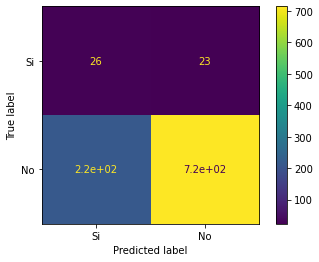

In [262]:
confusion_matrix, accuracy, error, precision, recall, f1 = validacion(Y_test,Y_predicted,1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Si', 'No'])
cm_display.plot()
plt.show()

In [263]:
print("Accuracy: "+str(accuracy))
print("Error: "+str(error))
print("Precisión: "+str(precision))
print("Recall: "+str(recall))
print("Medida F1: "+str(f1))

Accuracy: 0.7561224489795918
Error: 0.2438775510204082
Precisión: 0.10743801652892562
Recall: 0.5306122448979592
Medida F1: 0.17869415807560138


### Curva ROC:

In [266]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
auc = metrics.roc_auc_score(Y_test, Y_predicted)
print("Área bajo la curva ROC:  "+str(auc))

Área bajo la curva ROC:  0.6493018259935553


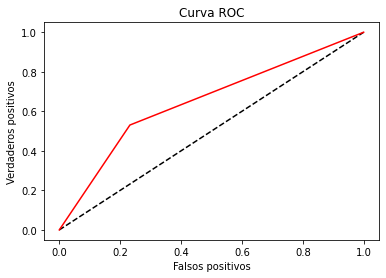

In [268]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted, drop_intermediate=False)
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.title('Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,'r')

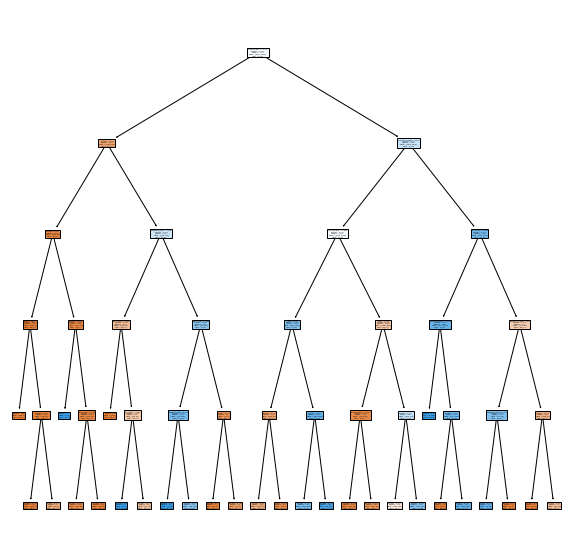

In [315]:
features = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "Smoking_status"]
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(random_forest.estimators_[0], feature_names = features, class_names = ["No_ACV", "Si_ACV"], filled=True)
fig.savefig('random_forest.png')

## Modelo de regresión logística.

Ahora se hace uso de un modelo estadístico muy similar a una red neuronal pero sin capas ocultas, son solo las capas de entrada y de salida. Posteriormente, los resultados obtenidos con regresión logística serán comparados con los obtenidos en un modelo de redes neuronales con el fin de constrastar el desempeño al agregarse capas ocultas.

para sintonizar lo hiperparámetros, se hizo uso de la función de GridSearchCv, la cual permitió realizar un barrido sobre todos los modelos posibles según un rango de valores para cada uno de los hiperparámetros.

Se realizan varias iteraciones manuales para encontrar un rango de barrido óptimo para cada uno de los hiperparámetros que son de importancia en la regresión logística.

In [158]:
grid = {
    'penalty' : ["l2"],
    'C': [0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001],
    'class_weight': ["balanced"],
    'solver': ["newton-cg","lbfgs","liblinear","sag"],
    'max_iter': [10000],
    'random_state' : [1]}

print(grid)

{'penalty': ['l2'], 'C': [0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001], 'class_weight': ['balanced'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'max_iter': [10000], 'random_state': [1]}


Se indica en el proceso de barrido de modelos que la validación se realice siguiendo un modelo de validación cruzada con un número de pliegues igual a 2. La medida a maximizar en el recorrido es la precisión ya que es el valor más crítico y que suele tener el valor más bajo con respecto a las demás medidas de validación.

In [160]:
from sklearn.linear_model import LogisticRegression
logistico = LogisticRegression()
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(scoring = ["f1"], refit = "f1", estimator = logistico, param_grid = grid, cv = CV, n_jobs = -1, verbose = 2)
grid_search.fit(X_sm, Y_sm)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
                               0.001],
                         'class_weight': ['balanced'], 'max_iter': [10000],
                         'penalty': ['l2'], 'random_state': [1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             refit='f1', scoring=['f1'], verbose=2)

Se obtienen los siguientes valores de los hiperparámetros óptimos:

In [161]:
grid_search.best_params_

{'C': 0.003,
 'class_weight': 'balanced',
 'max_iter': 10000,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

Teniendo estos, se construye un modelo definitivo de regresión logística

Penalización: norma l2

C: inverso de fuerza de regularización: 0.003
Algoritmo de solución: "liblinear"

Pesos en clases: balanceado

máximo número de iteraciones: 10000

Cabe resaltar que este modelo tiene pocos parámetros a comparación de los árboles de decisión y random forest.

Construcción del modelo con los parámetros dados.

In [270]:
logistico = LogisticRegression(C=0.003,
                               class_weight="balanced",
                               max_iter = 10000,
                               penalty = "l2",
                               solver = "liblinear",
                               random_state = 1)

### validación cruzada.

Como prueba preliminar, se realiza un modelo de validación cruzada con 10 splits. De allí se obtienen los valores de accuracy, precision, recall y medida f1.

In [163]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
accuracy = cross_val_score(logistico, X_sm, Y_sm, cv=CV, scoring = "accuracy")
accuracy

array([0.77986577, 0.80671141, 0.78657718, 0.80268456, 0.79060403,
       0.78791946, 0.78494624, 0.78225806, 0.78494624, 0.77016129])

El accuracy puede ser engañoso, ya que un modelo se puede entrenar muy bien considerando una de las clases pero descuidando la otra en un conjunto de datos desbalanceado, y aún así obtenerse valores altos de accuracy. Las siguientes medidas son más determinantes en el rendimiento del algoritmo.

In [164]:
precision = cross_val_score(logistico, X_sm, Y_sm, cv=CV, scoring = "precision")
precision

array([0.72807018, 0.76146789, 0.74709977, 0.75336323, 0.74828375,
       0.73626374, 0.72649573, 0.73333333, 0.72943723, 0.72087912])

In [165]:
recall = cross_val_score(logistico, X_sm, Y_sm, cv=CV, scoring = "recall")
recall

array([0.89247312, 0.89247312, 0.8655914 , 0.90080429, 0.8766756 ,
       0.89812332, 0.91397849, 0.88709677, 0.90591398, 0.88172043])

In [166]:
f1 = cross_val_score(logistico, X_sm, Y_sm, cv=CV, scoring = "f1")
f1

array([0.80193237, 0.82178218, 0.80199253, 0.82051282, 0.80740741,
       0.80917874, 0.80952381, 0.80291971, 0.80815348, 0.79322854])

In [167]:
from statistics import mean
precision_final =mean(precision)
print("precision final: "+str(precision_final))
recall_final =mean(recall)
print("Recall final: "+str(recall_final))
f1_final =mean(np.array(f1))
print("Medida F1: "+str(f1_final))

precision final: 0.7384693961297402
Recall final: 0.8914850528986134
Medida F1: 0.8076631576920609


### Testing

Se obtienen valores de precisión, recall y medida f1 buenos en validación cruzada. Sin embargo, hace falta poner a prueba el modelo utilizando el conjunto de datos destinado para validación final, con ello se sabe si el modelo entrenado con un conjunto de datos balanceado por oversampling sí predice bien en definitiva.

Para ello, se entrena el modelo con el conjunto de de entrenamiento y se predicen las clases usando el conjunto de datos de test final. Luego los resultados se comparan y se calculan las medidas de validación usando las clases reales destinadas a test final.

In [271]:
logistico = logistico.fit(X_sm, Y_sm)
Y_predicted = logistico.predict(X_test)

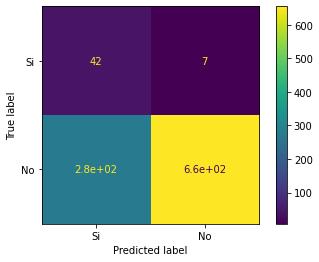

In [273]:
confusion_matrix, accuracy, error, precision, recall, f1 = validacion(Y_test,Y_predicted,1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Si', 'No'])
cm_display.plot()
plt.show()

In [274]:
print("Accuracy: "+str(accuracy))
print("Error: "+str(error))
print("Precisión: "+str(precision))
print("Recall: "+str(recall))
print("Medida F1: "+str(f1))

Accuracy: 0.7112244897959183
Error: 0.28877551020408165
Precisión: 0.1320754716981132
Recall: 0.8571428571428571
Medida F1: 0.22888283378746593


### Curva ROC:

In [278]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
auc = metrics.roc_auc_score(Y_test, Y_predicted)
print("Área bajo la curva ROC:  "+str(auc))

Área bajo la curva ROC:  0.7803437164339421


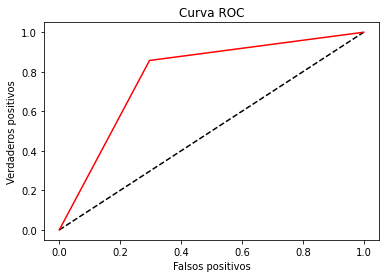

In [280]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted, drop_intermediate=False)
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.title('Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,'r')

## Red neuronal

Ahora se hace uso de un modelo de red neuronal. Este modelo será contrastado con los resultados obtenidos por regresión logística; esto con el objetivo de comparar la diferencia de desempeño al agregar capas ocultas y ver si vale la pena la mejora en rendimiento con respecto al coste computacional

Para sintonizar lo hiperparámetros de la red neuronal, se hizo uso de la función de GridSearchCv, la cual permitió realizar un barrido sobre todos los modelos posibles según un rango de valores para cada uno de los hiperparámetros.

Se realizan varias iteraciones manuales para encontrar un rango de barrido óptimo para cada uno de los hiperparámetros que son definitorios en el rendimento de la red.

In [320]:
grid = {
    'hidden_layer_sizes' : [(10),(5,5),(10,10),(10,5)],
    'activation': ["relu","logistic"],
    'solver': ["sgd"],
    'alpha': [0.001,0.0001, 0.00001],
    'learning_rate': ["constant","adaptive"],
    'learning_rate_init' : [0.001, 0.01, 0.0001],
    'momentum' : [0.9]}

print(grid)

{'hidden_layer_sizes': [10, (5, 5), (10, 10), (10, 5)], 'activation': ['relu', 'logistic'], 'solver': ['sgd'], 'alpha': [0.001, 0.0001, 1e-05], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.001, 0.01, 0.0001], 'momentum': [0.9]}


La medida a maximizar en el recorrido es la precisión ya que es el valor más crítico y que suele tener el valor más bajo con respecto a las demás medidas de validación.

In [321]:
from sklearn.neural_network import MLPClassifier
red_neuronal = MLPClassifier()
CV = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
grid_search = GridSearchCV(scoring = ["precision"], refit = "precision", estimator = red_neuronal, param_grid = grid, cv = CV, n_jobs = -1, verbose = 2)
grid_search.fit(X_sm, Y_sm)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=2, random_state=1),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [10, (5, 5), (10, 10), (10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.0001],
                         'momentum': [0.9], 'solver': ['sgd']},
             refit='precision', scoring=['precision'], verbose=2)

se obtienen los siguientes hiperparámetros que optimizan la medida de precisión.

In [322]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'momentum': 0.9,
 'solver': 'sgd'}

Así, se construye una red neuronal con los siguientes hiperparámetros:

Función de activación de las neuronas: "relu"

alpha (fuerza de regularización L2): 0.001

Tamaño de capas ocultas: (10,10), es decir 2 capas de 10 neuronas. no se colocan demasiadas capas ni gran cantidad de neuronas para evitar hacer overfitting.

Tasa de aprendizaje: "adaptive"

Tasa de aprendizaje inicial: 0.01

momentum: 0.9

Algoritmo de optimización: "sgd" descenso de gradiente estocástico

Construcción del modelo:

In [285]:
red_neuronal = MLPClassifier(
                hidden_layer_sizes=(10,10),
                activation = "relu",
                solver = 'sgd',
                batch_size = "auto",
                alpha = 0.001,
                learning_rate_init=0.0001,
                learning_rate = "adaptive",
                max_iter = 2000,
                random_state = 41,
                momentum = 0.9
            )

### Validación cruzada:

Como prueba preliminar, se realiza un modelo de validación cruzada con 10 splits. De allí se obtienen los valores de accuracy, precision, recall y medida f1.

In [286]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
accuracy = cross_val_score(red_neuronal, X_sm, Y_sm, cv=CV, scoring = "accuracy")
accuracy

array([0.77449664, 0.79731544, 0.79328859, 0.80134228, 0.77449664,
       0.79328859, 0.77822581, 0.77284946, 0.78629032, 0.78897849])

El accuracy puede ser engañoso, ya que un modelo se puede entrenar muy bien considerando una de las clases pero descuidando la otra en un conjunto de datos desbalanceado, y aún así obtenerse valores altos de accuracy. Las siguientes medidas son más determinantes en el rendimiento del algoritmo.

In [287]:
precision = cross_val_score(red_neuronal, X_sm, Y_sm, cv=CV, scoring = "precision")
precision

array([0.7372093 , 0.76885645, 0.76585366, 0.76223776, 0.75434243,
       0.75057208, 0.73154362, 0.74109264, 0.7414966 , 0.74599542])

In [288]:
recall = cross_val_score(red_neuronal, X_sm, Y_sm, cv=CV, scoring = "recall")
recall

array([0.85215054, 0.84946237, 0.84408602, 0.8766756 , 0.8150134 ,
       0.87935657, 0.87903226, 0.83870968, 0.87903226, 0.87634409])

In [289]:
f1 = cross_val_score(red_neuronal, X_sm, Y_sm, cv=CV, scoring = "f1")
f1

array([0.79052369, 0.80715198, 0.80306905, 0.81546135, 0.78350515,
       0.80987654, 0.7985348 , 0.78688525, 0.80442804, 0.80593325])

In [290]:
from statistics import mean
precision_final =mean(precision)
print("precision final: "+str(precision_final))
recall_final =mean(recall)
print("Recall final: "+str(recall_final))
f1_final =mean(np.array(f1))
print("Medida F1: "+str(f1_final))

precision final: 0.7499199967651206
Recall final: 0.8589862780708583
Medida F1: 0.8005369108173699


### Testing

Se obtienen valores de precisión, recall y medida f1 buenos en validación cruzada. Sin embargo, hace falta poner a prueba el modelo utilizando el conjunto de datos destinado para validación final, con ello se sabe si el modelo entrenado con un conjunto de datos balanceado por oversampling sí predice bien en definitiva.

Para ello, se entrena el modelo con el conjunto de de entrenamiento y se predicen las clases usando el conjunto de datos de test final. Luego los resultados se comparan y se calculan las medidas de validación usando las clases reales destinadas a test final.

In [299]:
red_neuronal = red_neuronal.fit(X_sm,Y_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [300]:
Y_predicted = red_neuronal.predict(X_test)

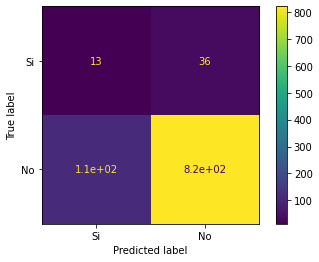

In [301]:
confusion_matrix, accuracy, error, precision, recall, f1 = validacion(Y_test,Y_predicted,1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Si', 'No'])
cm_display.plot()
plt.show()

In [302]:
print("Accuracy: "+str(accuracy))
print("Error: "+str(error))
print("Precisión: "+str(precision))
print("Recall: "+str(recall))
print("Medida F1: "+str(f1))

Accuracy: 0.8510204081632653
Error: 0.1489795918367347
Precisión: 0.10569105691056911
Recall: 0.2653061224489796
Medida F1: 0.15116279069767444


### Curva ROC

In [303]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted)
auc = metrics.roc_auc_score(Y_test, Y_predicted)
print("Área bajo la curva ROC:  "+str(auc))

Área bajo la curva ROC:  0.573576799140709


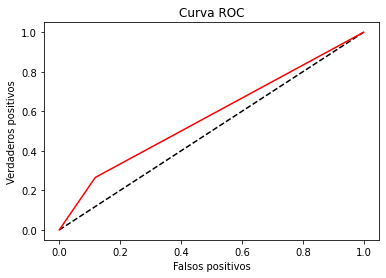

In [304]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted, drop_intermediate=False)
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.title('Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,'r')